<a href="https://colab.research.google.com/github/IMOKURI/signate-471/blob/main/%E5%8C%BB%E5%AD%A6%E8%AB%96%E6%96%87%E3%81%AE%E8%87%AA%E5%8B%95%E4%BB%95%E5%88%86%E3%81%91%E3%83%81%E3%83%A3%E3%83%AC%E3%83%B3%E3%82%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About this notebook ...

competition site: https://signate.jp/competitions/471







## ToDo

- [ ] pre train のモデルの save と load
- [ ] preprocess したデータの save と load (wandb)
- [ ] optune の seed 固定 https://book-read-yoshi.hatenablog.com/entry/2021/03/22/lightgbm_optuna_deterministic

### Idea

- [x] [ラベル判定結果の誤りに関するお知らせ](https://signate.jp/competitions/471/discussions/20210816152356-59) をとりこむ 
- [ ] 分類で推論、回帰で推論
- [x] 回帰の場合の境界値の最適化
    - [ ] second stage で学習べきかも
        - [ ] heamy という stacking のライブラリがある
        - [ ] CNN で stacking がいいかもしれない https://tawara.hatenablog.com/entry/2020/12/16/132415
            - 縦・横、チャネル数が、クラス数（１）・モデル数（ｎ）・１で、 1xn で畳み込む 
    - [ ] Nelder-Mead 法 という最適化手法を調べる
- [ ] 最適な境界値はモデルによって異なるので、アンサンブルの時は、 vote ensemble がいいかもしれない
- [x] アブストで事前学習して、タイトルでメイン学習 https://www.kaggle.com/maunish/clrp-pytorch-roberta-pretrain
    - 事前学習は、Masked LM
- [x] タイトルだけで学習・推論
- [ ] タイトル + アブストで学習・推論
    - [ ] タイトルだけで推論したのとアンサンブルができる
    - [ ] Longformer がいいかもしれない `allenai/longformer-base-4096`
    - [ ] large モデルためす
- [ ] アブスト + タイトル で学習・推論
- [ ] アブストが空 or not でモデルわける
- [ ] アブストの max length 調整
    - [ ] 途中で切る。デフォルトの 512 はありそう。ほとんどのアブストがその長さで収まる
    - [ ] 要約する方法があるかなぁ
- [x] dropout を 0 にする
- [x] gradient cripping を 0.2 or 0.5 で試す
- [ ] re-initialization
    - This paper (https://arxiv.org/pdf/2006.05987.pdf) shows that fine-tuning with reinitialization last N layers works well.
    - Different models have different optimal N. Almost models set N=4~5, gpt2-models set N=6.
    - https://github.com/kurupical/commonlit/blob/8781139c8ed4cc59f7c7ac9d97c72c351ee91377/exp/exp502.py#L497
- [ ] Pre trained なレイヤーのfreeze https://raphaelb.org/posts/freezing-bert/
- [ ] Recall を伸ばすための loss function は考えられるか。 https://openreview.net/pdf?id=SlprFTIQP3
    - [x] f1 score を微分可能にして、 loss 関数に使うアプローチ https://gist.github.com/SuperShinyEyes/dcc68a08ff8b615442e3bc6a9b55a354 https://towardsdatascience.com/the-unknown-benefits-of-using-a-soft-f1-loss-in-classification-systems-753902c0105d
    - [ ] epoch ごとに beta の値を増やしていく epoch * 2 とか
- [ ] 出現する単語のクラスタリング
- [x] TF-IDF して、 リッジ回帰 → ベースライン2 でやった
    - IF-IDF の結果もBERTの特徴量にできないだろうか
    - https://www.kaggle.com/semyonkoshkarov/tf-idf-linearsvr-baseline も参考になるかも
- [ ] 医療用語で事前学習されたモデルを使ってみる
    - [x] BioBERT https://github.com/dmis-lab/biobert `dmis-lab/biobert-base-cased-v1.1` 286k downloads
        - [ ] large モデル試す
    - [ ] Med-BERT https://github.com/ZhiGroup/Med-BERT
        - 診断精度に貢献しているかもしれない(いや、一般的な話だったｗ) https://www.nature.com/articles/s41746-021-00455-y
    - [x] `microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext` 30.8k downloads https://www.axion.zone/microsoft-researchers-claim-state-of-the-art-biomedical-nlp-model/
    - [x] `bionlp/bluebert_pubmed_uncased_L-12_H-768_A-12` 4.3k downloads https://github.com/ncbi-nlp/bluebert
        - [ ] large モデル試す
    - [x] `emilyalsentzer/Bio_ClinicalBERT` https://huggingface.co/emilyalsentzer/Bio_ClinicalBERT
    - [ ] `emilyalsentzer/Bio_Discharge_Summary_BERT` https://huggingface.co/emilyalsentzer/Bio_Discharge_Summary_BERT
    - [x] `lordtt13/COVID-SciBERT` https://huggingface.co/lordtt13/COVID-SciBERT
    - [ ] `allenai/scibert_scivocab_uncased` https://huggingface.co/allenai/scibert_scivocab_uncased
- [ ] Augmentation https://neptune.ai/blog/data-augmentation-nlp
    - [ ] Back translation: 他言語に翻訳して、もう一回翻訳する（英語→フランス語→英語） https://qiita.com/nena0undefined/items/c2926bad07039e5540ab
    - [ ] Synonym Replacement: 単語のいくつかを、同じ意味の別の単語に置き換える
        - [ ] 自然言語の augmentation ができるライブラリ https://github.com/makcedward/nlpaug
- [ ] TTA
- [ ] ベースラインのシンプルさを取り戻す。(思ったよりベースラインのスコアが良かったので、それを取り込む・・・）
    - [ ] weight decay を調整 0.01 or 0


### Experiments

- BERT でアブストの　pre train をしてもスコアは上がっていない（学習の方法を工夫した方がよいかも）
- BERT Large は title の学習には大きすぎて？ loss が Base モデルに及ばない。
- epoch 3 で val loss が下がらないので、 epoch 3 で aug かけるとかありかもしれない
- `dmis-lab/biobert-base-cased-v1.1` と `bionlp/bluebert_pubmed_uncased_L-12_H-768_A-12` の成績がよい


## Prepare for Colab

In [1]:
!nvidia-smi

Thu Sep  2 12:12:21 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
import sys

if os.path.exists('init.txt'):
    print("Already initialized.")

else:
    if 'google.colab' in sys.modules:
        from google.colab import drive
        drive.mount('/gdrive')

        !cp /gdrive/MyDrive/Datasets/signate-471/train.csv .
        !cp /gdrive/MyDrive/Datasets/signate-471/test.csv .
        !cp /gdrive/MyDrive/Datasets/signate-471/sample_submit.csv .

    # for StratifiedGroupKFold
    # !pip uninstall -y scikit-learn
    # !pip install --pre --extra-index https://pypi.anaconda.org/scipy-wheels-nightly/simple scikit-learn

    # for MultilabelStratifiedKFold
    !pip install -q iterative-stratification

    # !pip install -qU 'git+https://github.com/katsura-jp/pytorch-cosine-annealing-with-warmup'

    !pip install -q wandb
    !pip install -q optuna
    !pip install -q transformers
    !pip install -q textstat

    !touch init.txt

Already initialized.


In [3]:
# Install_LightGBM_with_GPU

if os.path.exists('init_lightgbm.txt'):
    print("Already initialized.")

else:
    ! git clone --recursive https://github.com/Microsoft/LightGBM

    %cd /content/LightGBM
    ! mkdir -p build

    %cd build
    ! cmake -DUSE_GPU=1 /content/LightGBM
    ! make -j$(nproc)
    ! sudo apt-get -y install python-pip
    ! sudo -H pip install setuptools pandas==1.3.0 numpy scipy scikit-learn -U

    %cd /content/LightGBM/python-package
    ! sudo python setup.py install --precompile

    %cd /content/

    !touch init_lightgbm.txt

Already initialized.


## Library

In [4]:
import glob
import json
import math
import os
import random
import re
import time
import warnings
from contextlib import contextmanager

# import lightgbm as lgb
import optuna.integration.lightgbm as lgb
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import textstat
import torch
import torch.nn as nn
import torch.nn.functional as F
import transformers as T
import wandb
# from cosine_annealing_warmup import CosineAnnealingWarmupRestarts
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from sklearn.metrics import mean_squared_error, fbeta_score
from sklearn.model_selection import KFold, StratifiedKFold  # , StratifiedGroupKFold
from torch.optim import SGD, Adam  # , AdamW
from torch.optim.lr_scheduler import CosineAnnealingLR, CosineAnnealingWarmRestarts, ReduceLROnPlateau
from torch.utils.data import DataLoader, Dataset
from tqdm.notebook import tqdm


In [5]:
warnings.filterwarnings("ignore")

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
netrc = "../input/wandbtoken/.netrc"

if 'google.colab' in sys.modules:
    netrc = "/gdrive/MyDrive/.netrc"

!cp -f {netrc} ~/

!wandb login

wandb: Currently logged in as: imokuri (use `wandb login --relogin` to force relogin)


In [9]:
wandb_job_type = ""
wandb_notes = ""
wandb_tags = []

## Load Data

In [10]:
DATA_DIR = "../input/signate-471/"
OUTPUT_DIR = "./"

if 'google.colab' in sys.modules:
    DATA_DIR = "./"

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [11]:
train = pd.read_csv(DATA_DIR + "train.csv")
test = pd.read_csv(DATA_DIR + "test.csv")
sub = pd.read_csv(DATA_DIR + "sample_submit.csv", header=None)
sub.columns = ["id", "judgement"]

## Config

In [12]:
class Config:
    wandb_entity = "ponkots"
    wandb_project = "signate-471"
    print_freq = 100

    pre_train = False
    train = False
    validate = False
    inference = False
    stack = True
    stack_optuna = True

    debug = False
    multi_gpu = False
    apex = False


In [13]:
if Config.pre_train:
    wandb_job_type = "pre_training"

elif Config.train:
    wandb_job_type = "training"

elif Config.inference:
    wandb_job_type = "inference"

elif Config.validate:
    wandb_job_type = "validation"

elif Config.stack:
    wandb_job_type = "stacking"

In [14]:
if Config.apex:
    from apex import amp

In [15]:
# seed = random.randrange(10000)
seed = 440

print(seed)

440


In [16]:
config_defaults = {
    "seed": seed,
    "input": "title_abstract",  # "abstract_title",  # "preprocessed_title_abstract",  # "title", # "title_abstract",
    "max_len": 512,
    "border": "minimize", # "fixed", "minimize",
    "n_class": 1,
    "n_fold": 5,
    "gradient_accumulation_steps": 2,
    "max_grad_norm": 1000,
    "num_workers": 4,
    "batch_size": 12,
    "epochs": 3,
    "optimizer": "BertAdamW",
    "scheduler": "get_cosine_schedule_with_warmup",
    "criterion": "BCEWithLogitsLoss",  # "FBetaLoss",  # "BCEWithLogitsLoss",
    "lr": 2e-5,
    "min_lr": 1e-5,
    "weight_decay": 0.01,
    "dropout": 0.1,
    "model_name": "",
    "reinit_layers": 0,
    "freeze_layers": 0,
    "best": "loss",  # "score",
    "inference_runs": [
        "1uv8m7j0", # 56
        "x2rmxctu", # 59
        "258um1kf", # 60
    ],
}

In [17]:
if Config.stack:
    config_stack = {
        "objective": "binary",
        "criterion": "binary_logloss",
    }
    config_defaults.update(config_stack)

    if not Config.stack_optuna:
        config_stack_manual = {
            "lr": 0.01,
            "max_depth": 7,
            "num_leaves": 31,
            "min_data_in_leaf": 20,
            "dropout": 0.1,
        }
        config_defaults.update(config_stack_manual)


In [18]:
if not (Config.validate or Config.inference or Config.stack):
    config_defaults["inference_runs"] = []

In [19]:
if Config.debug:
    config_defaults["epochs"] = 1
    Config.print_freq = 10

In [20]:
if config_defaults["optimizer"] == "BertAdamW":
    config_defaults["lr_69"] = 5e-5
    config_defaults["lr_133"] = 1e-4

In [21]:
# Update by epoch
# num_steps = config_defaults["epochs"]

# Update by batch
num_data = 1000 if Config.debug else len(train)
num_steps = num_data // config_defaults["n_fold"] * (config_defaults["n_fold"] - 1) // config_defaults["batch_size"] // config_defaults["gradient_accumulation_steps"] * config_defaults["epochs"]

print(num_steps)

if config_defaults["scheduler"] == "CosineAnnealingWarmRestarts":
    config_defaults["T_0"] = num_steps

elif config_defaults["scheduler"] == "CosineAnnealingLR":
    config_defaults["T_max"] = num_steps

elif config_defaults["scheduler"] == "ReduceLROnPlateau":
    config_defaults["factor"] = 0.2
    config_defaults["patience"] = 4
    config_defaults["eps"] = 1e-6

elif config_defaults["scheduler"] == "CosineAnnealingWarmupRestarts":
    config_defaults["first_cycle_steps"] = num_steps
    config_defaults["warmup_steps"] = num_steps // 10

elif config_defaults["scheduler"] == "get_cosine_schedule_with_warmup":
    config_defaults["num_training_steps"] = num_steps
    config_defaults["num_warmup_steps"] = max(50, num_steps // 10)

2712


In [22]:
if Config.debug:
    run = wandb.init(entity=Config.wandb_entity, project=Config.wandb_project, config=config_defaults, mode="disabled")
else:
    run = wandb.init(entity=Config.wandb_entity, project=Config.wandb_project, config=config_defaults, notes=wandb_notes, tags=wandb_tags, job_type=wandb_job_type, save_code=True)

wandb: Currently logged in as: imokuri (use `wandb login --relogin` to force relogin)


In [23]:
config = wandb.config

## EDA-1

In [24]:
# アブストが空っぽのが結構ある
print(train.isnull().sum())
print(test.isnull().sum())

id              0
title           0
abstract     4390
judgement       0
dtype: int64
id             0
title          0
abstract    6546
dtype: int64


## Preprocessing

In [25]:
def preprocess(data):
    
    title_abstract = []
    for e in data:

        # アルファベット以外は空白に置換します。
        e = re.sub("[^a-zA-Z]", " ", e)

        # 小文字に変換します。
        e = e.lower()

        # token に分割します。
        e = nltk.word_tokenize(e)

        # stop word を削除します。
        e = [word for word in e if not word in set(nltk.corpus.stopwords.words("english"))]

        # 見出し語化します。
        lemma = nltk.WordNetLemmatizer()
        e = [lemma.lemmatize(word) for word in e]
        e = " ".join(e)

        title_abstract.append(e)

    return title_abstract

In [26]:
def get_train_data(train):

    # NaN を空白で埋めます。
    train = train.fillna("")

    # abstract の有無を Stratified KFold で使います。
    train["nan_abstract"] = np.where(train["abstract"] == "", 1, 0)

    # title の単語数
    train["len_title"] = train["title"].apply(lambda x: len(x.split()))

    # abstract の単語数
    train["len_abstract"] = train["abstract"].apply(lambda x: len(x.split()))

    # title と abstract を接続します。
    train["title_abstract"] = train[["title", "abstract"]].agg(" ".join, axis=1)
    train["abstract_title"] = train[["abstract", "title"]].agg(" ".join, axis=1)

    # train["preprocessed_title_abstract"] = preprocess(train["title_abstract"])

    # 前処理した文の単語数
    # train["len_preprocessed_title_abstract"] = train["preprocessed_title_abstract"].apply(lambda x: len(x.split()))

    return train

In [27]:
def get_test_data(test):

    # NaN を空白で埋めます。
    test = test.fillna("")

    # title の単語数
    test["len_title"] = test["title"].apply(lambda x: len(x.split()))

    # abstract の単語数
    test["len_abstract"] = test["abstract"].apply(lambda x: len(x.split()))

    # title と abstract を接続します。
    test["title_abstract"] = test[["title", "abstract"]].agg(" ".join, axis=1)
    test["abstract_title"] = test[["abstract", "title"]].agg(" ".join, axis=1)

    # test["preprocessed_title_abstract"] = preprocess(test["title_abstract"])

    # 前処理した文の単語数
    # test["len_preprocessed_title_abstract"] = test["preprocessed_title_abstract"].apply(lambda x: len(x.split()))

    return test

In [28]:
if False:  # os.path.exists("/gdrive/MyDrive/Datasets/signate-471/preprocessed_train.csv"):
    !cp -f /gdrive/MyDrive/Datasets/signate-471/preprocessed_train.csv .
    train = pd.read_csv("preprocessed_train.csv")

    # csv を再読み込みすると NaN に戻ってしまうので、再度変換します。
    train = train.fillna("")

else:
    # 一度、前処理したものは保存しておきます。
    train = get_train_data(train)
    # train.to_csv("preprocessed_train.csv")

    # artifact = wandb.Artifact('preprocessed_train', type='dataset')
    # artifact.add_file("preprocessed_train.csv")
    # run.log_artifact(artifact)

    # !cp -f preprocessed_train.csv /gdrive/MyDrive/Datasets/signate-471/

In [29]:
if False:  # os.path.exists("/gdrive/MyDrive/Datasets/signate-471/preprocessed_test.csv"):
    !cp -f /gdrive/MyDrive/Datasets/signate-471/preprocessed_test.csv .
    test = pd.read_csv("preprocessed_test.csv")

    # csv を再読み込みすると NaN に戻ってしまうので、再度変換します。
    test = test.fillna("")

else:
    # 一度、前処理したものは保存しておきます。
    test = get_test_data(test)
    # test.to_csv("preprocessed_test.csv")

    # artifact = wandb.Artifact('preprocessed_test', type='dataset')
    # artifact.add_file("preprocessed_test.csv")
    # run.log_artifact(artifact)

    # !cp -f preprocessed_test.csv /gdrive/MyDrive/Datasets/signate-471/

## EDA-2

In [30]:
# abstract に改行は含まれていない
print(len(train[train["abstract"].str.contains("\n")]))
print(len(test[test["abstract"].str.contains("\n")]))

0
0


In [31]:
# title の単語数
print(train["len_title"].max())
print(test["len_title"].max())

53
69


In [32]:
# abstract の単語数
print(train["len_abstract"].max())
print(test["len_abstract"].max())

1535
1445


In [33]:
# 前処理した文の単語数
# print(train["len_preprocessed_title_abstract"].max())
# print(test["len_preprocessed_title_abstract"].max())

In [34]:
for ds in [train, test, sub]:
    print(f"=" * 80)
    ds.info()
    display(ds.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27145 entries, 0 to 27144
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              27145 non-null  int64 
 1   title           27145 non-null  object
 2   abstract        27145 non-null  object
 3   judgement       27145 non-null  int64 
 4   nan_abstract    27145 non-null  int64 
 5   len_title       27145 non-null  int64 
 6   len_abstract    27145 non-null  int64 
 7   title_abstract  27145 non-null  object
 8   abstract_title  27145 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.9+ MB


,id,title,abstract,judgement,nan_abstract,len_title,len_abstract,title_abstract,abstract_title
0,0,One-year age changes in MRI brain volumes in o...,Longitudinal studies indicate that declines in...,0,0,10,193,One-year age changes in MRI brain volumes in o...,Longitudinal studies indicate that declines in...
1,1,Supportive CSF biomarker evidence to enhance t...,The present study was undertaken to validate t...,0,0,23,214,Supportive CSF biomarker evidence to enhance t...,The present study was undertaken to validate t...
2,2,Occurrence of basal ganglia germ cell tumors w...,Objective: To report a case series in which ba...,0,0,10,133,Occurrence of basal ganglia germ cell tumors w...,Objective: To report a case series in which ba...
3,3,New developments in diagnosis and therapy of C...,The etiology and pathogenesis of idiopathic ch...,0,0,13,374,New developments in diagnosis and therapy of C...,The etiology and pathogenesis of idiopathic ch...
4,4,Prolonged shedding of SARS-CoV-2 in an elderly...,,0,1,16,0,Prolonged shedding of SARS-CoV-2 in an elderly...,Prolonged shedding of SARS-CoV-2 in an elderl...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40834 entries, 0 to 40833
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              40834 non-null  int64 
 1   title           40834 non-null  object
 2   abstract        40834 non-null  object
 3   len_title       40834 non-null  int64 
 4   len_abstract    40834 non-null  int64 
 5   title_abstract  40834 non-null  object
 6   abstract_title  40834 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.2+ MB


,id,title,abstract,len_title,len_abstract,title_abstract,abstract_title
0,27145,Estimating the potential effects of COVID-19 p...,The objective of the paper is to analyse chang...,16,245,Estimating the potential effects of COVID-19 p...,The objective of the paper is to analyse chang...
1,27146,Leukoerythroblastic reaction in a patient with...,,8,0,Leukoerythroblastic reaction in a patient with...,Leukoerythroblastic reaction in a patient wit...
2,27147,[15O]-water PET and intraoperative brain mappi...,[15O]-water PET was performed on 12 patients w...,14,315,[15O]-water PET and intraoperative brain mappi...,[15O]-water PET was performed on 12 patients w...
3,27148,Adaptive image segmentation for robust measure...,We present a method that significantly improve...,11,119,Adaptive image segmentation for robust measure...,We present a method that significantly improve...
4,27149,Comparison of Epidemiological Variations in CO...,The objective of this study is to compare the ...,13,224,Comparison of Epidemiological Variations in CO...,The objective of this study is to compare the ...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40834 entries, 0 to 40833
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         40834 non-null  int64
 1   judgement  40834 non-null  int64
dtypes: int64(2)
memory usage: 638.2 KB


,id,judgement
0,27145,0
1,27146,1
2,27147,1
3,27148,0
4,27149,1


### 目的変数 judgement の分布

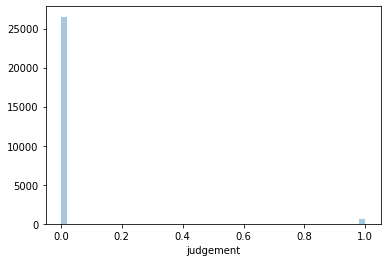

In [35]:
sns.distplot(train["judgement"], kde=False)

In [36]:
train["judgement"].value_counts()

0    26515
1      630
Name: judgement, dtype: int64

In [37]:
border = len(train[train["judgement"] == 1]) / len(train["judgement"])
print(border)

0.0232086940504697


### title の単語数の分布

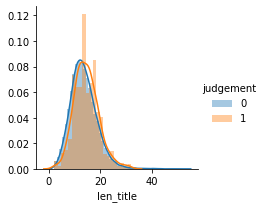

In [38]:
g = sns.FacetGrid(train[["judgement", "len_title"]], hue='judgement')
g.map(sns.distplot, 'len_title', label='judgement', hist=True, rug=False)
g.add_legend()

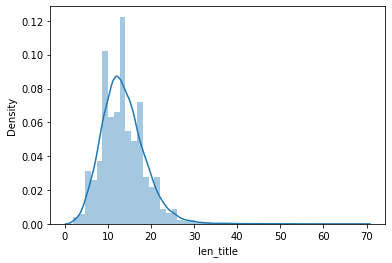

In [39]:
sns.distplot(test["len_title"], hist=True, rug=False)

### abstract の単語数の分布

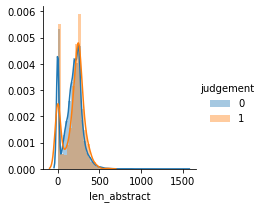

In [40]:
g = sns.FacetGrid(train[["judgement", "len_abstract"]], hue='judgement')
g.map(sns.distplot, 'len_abstract', label='judgement', hist=True, rug=False)
g.add_legend()

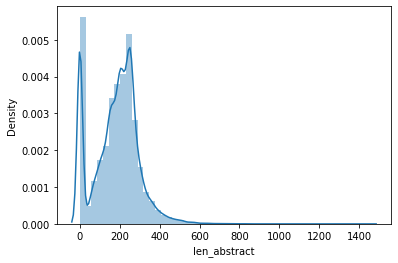

In [41]:
sns.distplot(test["len_abstract"], hist=True, rug=False)

## Load Models

In [42]:
if Config.validate:
    api = wandb.Api()

    for n, run_id in enumerate(config.inference_runs):
        if not os.path.exists(run_id):
            os.makedirs(run_id)

        run_path = f"{Config.wandb_entity}/{Config.wandb_project}/{run_id}"
        run = api.run(run_path)

        try:
            run.file("oof_df.csv").download(run_id)
        except wandb.CommError:
            # Already downloaded.
            pass

        oof = pd.read_csv(f"{run_id}/oof_df.csv")[["id", "preds"]]
        oof.columns = ["id", f"preds{n}"]
        train = pd.merge(train, oof, on="id")
    
    print(train.columns)

In [43]:
if Config.inference:
    api = wandb.Api()
    inference_models = []

    for n, run_id in enumerate(config.inference_runs):
        if not os.path.exists(run_id):
            os.makedirs(run_id)

        run_path = f"{Config.wandb_entity}/{Config.wandb_project}/{run_id}"
        run = api.run(run_path)

        inference_model = {}
        inference_model["run_id"] = run_id
        inference_model["model_name"] = run.config["model_name"]

        for fold in range(config.n_fold):
            try:
                run.file(f"{inference_model['model_name'].replace('/', '-')}_fold{fold}_best.pth").download(run_id)
            except wandb.CommError:
                # Already downloaded.
                pass

            model_preds = torch.load(f"{run_id}/{inference_model['model_name'].replace('/', '-')}_fold{fold}_best.pth")
            inference_model[f"state_fold{fold}"] = model_preds["model"]
            inference_model[f"preds_fold{fold}"] = model_preds["preds"]

        inference_models.append(inference_model)
    
    print({m['run_id']: m['model_name'] for m in inference_models})

In [44]:
if Config.stack:
    api = wandb.Api()

    feat_id = 0
    for n, run_id in enumerate(config.inference_runs):
        if not os.path.exists(run_id):
            os.makedirs(run_id)

        run_path = f"{Config.wandb_entity}/{Config.wandb_project}/{run_id}"
        run = api.run(run_path)

        try:
            run.file("validation_df.csv").download(run_id)
        except wandb.CommError:
            # Already downloaded.
            pass

        try:
            run.file("prediction_df.csv").download(run_id)
        except wandb.CommError:
            # Already downloaded.
            pass

        val = pd.read_csv(f"{run_id}/validation_df.csv")
        pred = pd.read_csv(f"{run_id}/prediction_df.csv")

        cols = [c for c in val.columns if c.startswith("preds")]
        val = val[["id"] + cols]
        pred = pred[["id"] + cols]

        adjust_cols = ["id"] + [f"preds{n}" for n in range(feat_id, feat_id + len(cols))]
        val.columns = adjust_cols
        pred.columns = adjust_cols

        feat_id += len(cols)

        train = pd.merge(train, val, on="id")
        test = pd.merge(test, pred, on="id")
    
    print(f"train: {train.columns}")
    print(f"test: {test.columns}")

train: Index(['id', 'title', 'abstract', 'judgement', 'nan_abstract', 'len_title',
       'len_abstract', 'title_abstract', 'abstract_title', 'preds0', 'preds1',
       'preds2', 'preds3', 'preds4', 'preds5', 'preds6', 'preds7', 'preds8'],
      dtype='object')
test: Index(['id', 'title', 'abstract', 'len_title', 'len_abstract',
       'title_abstract', 'abstract_title', 'preds0', 'preds1', 'preds2',
       'preds3', 'preds4', 'preds5', 'preds6', 'preds7', 'preds8'],
      dtype='object')


In [45]:
if Config.debug and not Config.stack:
    train = train.sample(n=1000, random_state=config.seed).reset_index(drop=True)
    test = test.sample(n=1000, random_state=config.seed).reset_index(drop=True)
    sub = sub.sample(n=1000, random_state=config.seed).reset_index(drop=True)

## CV Split

In [46]:
Fold = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for n, (train_index, val_index) in enumerate(Fold.split(train, train[["judgement", "nan_abstract"]])):
    train.loc[val_index, "fold"] = int(n)
train["fold"] = train["fold"].astype(np.uint8)
print(train.groupby(["fold", "judgement", "nan_abstract"]).size())

fold  judgement  nan_abstract
0     0          0               4446
                 1                857
      1          0                105
                 1                 21
1     0          0               4448
                 1                855
      1          0                103
                 1                 23
2     0          0               4448
                 1                855
      1          0                103
                 1                 23
3     0          0               4448
                 1                855
      1          0                103
                 1                 23
4     0          0               4455
                 1                848
      1          0                 96
                 1                 30
dtype: int64


## Utils

In [47]:
@contextmanager
def timer(name):
    t0 = time.time()
    LOGGER.info(f"[{name}] start")
    yield
    LOGGER.info(f"[{name}] done in {time.time() - t0:.0f} s.")


def init_logger(log_file=OUTPUT_DIR + "train.log"):
    from logging import INFO, FileHandler, Formatter, StreamHandler, getLogger

    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=log_file)
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger


LOGGER = init_logger()


def seed_torch(seed=42):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True


seed_torch(seed=config.seed)


## Dataset

In [48]:
class BaseDataset(Dataset):
    def __init__(self, df, model_name, include_labels=True):
        tokenizer = T.AutoTokenizer.from_pretrained(model_name)

        self.df = df
        self.include_labels = include_labels

        self.title = df[config.input].tolist()
        self.encoded = tokenizer.batch_encode_plus(
            self.title,
            padding = 'max_length',            
            max_length = config.max_len,
            truncation = True,
            return_attention_mask=True
        )
        
        if self.include_labels:
            self.labels = df["judgement"].values

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        input_ids = torch.tensor(self.encoded['input_ids'][idx])
        attention_mask = torch.tensor(self.encoded['attention_mask'][idx])

        if self.include_labels:
            label = torch.tensor(self.labels[idx]).float()
            return input_ids, attention_mask, label

        return input_ids, attention_mask


In [49]:
# Test

if config.model_name != "":

    train_ds = BaseDataset(train, config.model_name)

    for i in range(1):
        input_ids, attention_mask, label = train_ds[i]
        print(input_ids)
        print(attention_mask)
        print(f"label: {label}")


## Model

### BaseModel

In [50]:
if config.model_name != "":
    print(T.AutoConfig.from_pretrained(config.model_name))

In [51]:
class BaseModel(nn.Module):
    def __init__(self, model_name):
        super().__init__()

        if "base" in model_name or "L-12" in model_name or "COVID-SciBERT" in model_name:
            out_dim = 768
        elif "large" in model_name or "L-24" in model_name:
            out_dim = 1024

        auto_config = T.AutoConfig.from_pretrained(model_name)
        auto_config.update({
            "output_hidden_states": True,
            "hidden_dropout_prob": config.dropout,
            # "layer_norm_eps": 1e-7,
        })
        
        self.auto_model = T.AutoModel.from_pretrained(model_name, config=auto_config)  

        self.attention = nn.Sequential(
            nn.Linear(out_dim, 512),            
            nn.Tanh(),                       
            nn.Linear(512, 1),
            nn.Softmax(dim=1)
        )        

        self.regressor = nn.Sequential(
            nn.Linear(out_dim, 1)                        
        )

        if config.reinit_layers > 0:
            self.re_init()

        if config.freeze_layers > 0:
            self.freeze()

    def forward(self, input_ids, attention_mask):
        bert_output = self.auto_model(input_ids=input_ids, attention_mask=attention_mask)        

        # There are a total of 13 layers of hidden states.
        # 1 for the embedding layer, and 12 for the 12 Roberta layers.
        # We take the hidden states from the last Roberta layer.
        last_layer_hidden_states = bert_output.hidden_states[-1]

        # The number of cells is config.max_len.
        # The size of the hidden state of each cell is 768 (for roberta-base).
        # In order to condense hidden states of all cells to a context vector,
        # we compute a weighted average of the hidden states of all cells.
        # We compute the weight of each cell, using the attention neural network.
        weights = self.attention(last_layer_hidden_states)
                
        # weights.shape is config.batch_size x config.max_len x 1
        # last_layer_hidden_states.shape is config.batch_size x config.max_len x 768        
        # Now we compute context_vector as the weighted average.
        # context_vector.shape is config.batch_size x 768
        context_vector = torch.sum(weights * last_layer_hidden_states, dim=1)        
        
        # Now we reduce the context vector to the prediction score.
        out = self.regressor(context_vector).squeeze()

        return out

    def re_init(self):
        # re-init pooler
        self.auto_model.pooler.dense.weight.data.normal_(mean=0.0, std=self.auto_model.config.initializer_range)
        self.auto_model.pooler.dense.bias.data.zero_()
        for p in self.auto_model.pooler.parameters():
            p.requires_grad = True

        # re-init encoder
        layers = self.auto_model.encoder.layer[-config.reinit_layers:]
        for layer in layers:
            for module in layer.modules():
                if isinstance(module, nn.Linear):
                    # Slightly different from the TF version which uses truncated_normal for initialization
                    # cf https://github.com/pytorch/pytorch/pull/5617
                    module.weight.data.normal_(mean=0.0, std=self.auto_model.config.initializer_range)
                    if module.bias is not None:
                        module.bias.data.zero_()
                elif isinstance(module, nn.Embedding):
                    module.weight.data.normal_(mean=0.0, std=self.auto_model.config.initializer_range)
                    if module.padding_idx is not None:
                        module.weight.data[module.padding_idx].zero_()
                elif isinstance(module, nn.LayerNorm):
                    module.bias.data.zero_()
                    module.weight.data.fill_(1.0)

    def freeze(self):
        # freeze embedding
        for param in self.auto_model.embeddings.parameters():
            param.requires_grad = False

        # freeze encoder
        layers = self.auto_model.encoder.layer[:config.freeze_layers]
        for layer in layers:
            for param in layer.parameters():
                param.requires_grad = False

In [52]:
# Test

if config.model_name != "":

    model = BaseModel(config.model_name)
    print(model)

    train_dataset = BaseDataset(train, config.model_name)
    train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4, drop_last=True)

    for input_ids, attention_mask, labels in train_loader:
        output = model(input_ids, attention_mask)
        print(output)
        break


In [53]:
# Test

if config.model_name != "":
    for n, (name, tensor) in enumerate(list(model.named_parameters())):
        print(f"{n:>4}: {tensor.requires_grad}, {name}")

### StackingModel

## Optimizer

In [54]:
def bert_optimizer(model):
    named_parameters = list(model.named_parameters())    
    
    if "albert-base" in config.model_name:
        bert_parameters = named_parameters[:23]    
        attention_parameters = named_parameters[25:29]
        regressor_parameters = named_parameters[29:]
        second_block = 999
        third_block = 999

    elif "base" in config.model_name or "L-12" in config.model_name or "COVID-SciBERT" in config.model_name:
        bert_parameters = named_parameters[:197]    
        attention_parameters = named_parameters[199:203]
        regressor_parameters = named_parameters[203:]
        second_block = 69
        third_block = 133

    elif "large" in config.model_name or "L-24" in config.model_name:
        bert_parameters = named_parameters[:388]    
        attention_parameters = named_parameters[391:395]
        regressor_parameters = named_parameters[395:]
        second_block = 133
        third_block = 261
        
    attention_group = [params for (name, params) in attention_parameters]
    regressor_group = [params for (name, params) in regressor_parameters]

    parameters = []
    parameters.append({"params": attention_group})
    parameters.append({"params": regressor_group})

    for layer_num, (name, params) in enumerate(bert_parameters):
        weight_decay = 0.0 if "bias" in name else config.weight_decay

        lr = config.lr

        if layer_num >= second_block:        
            lr = config.lr_69

        if layer_num >= third_block:
            lr = config.lr_133

        parameters.append({"params": params, "weight_decay": weight_decay, "lr": lr})

    return T.AdamW(parameters)


## Loss

In [55]:
class RMSELoss(nn.Module):
    def __init__(self, eps=1e-7):
        super().__init__()
        self.mse = nn.MSELoss()
        self.eps = eps
        
    def forward(self, yhat, y):
        loss = torch.sqrt(self.mse(yhat, y) + self.eps)
        return loss

In [56]:
# https://gist.github.com/SuperShinyEyes/dcc68a08ff8b615442e3bc6a9b55a354
class FBetaLoss(nn.Module):

    def __init__(self, beta=1.0, epsilon=1e-7):
        super().__init__()
        self.beta = beta
        self.epsilon = epsilon
        
    def forward(self, y_pred, y_true):
        tp = (y_true * y_pred).sum(dim=0).to(torch.float32)
        tn = ((1 - y_true) * (1 - y_pred)).sum(dim=0).to(torch.float32)
        fp = ((1 - y_true) * y_pred).sum(dim=0).to(torch.float32)
        fn = (y_true * (1 - y_pred)).sum(dim=0).to(torch.float32)

        precision = tp / (tp + fp + self.epsilon)
        recall = tp / (tp + fn + self.epsilon)

        beta_squared = self.beta ** 2
        fbeta = (1 + beta_squared) * precision * recall / (beta_squared * precision + recall + self.epsilon)
        fbeta = fbeta.clamp(min=self.epsilon, max=1-self.epsilon)
        return 1 - fbeta.mean()

## Scoring

In [57]:
def get_score(y_true, y_pred, b=border):
    y_pred = np.where(y_pred < b, 0, 1)
    return fbeta_score(y_true, y_pred, beta=7.0)

In [58]:
def get_result(result_df, fold=config.n_fold):
    preds = result_df["preds"].values
    labels = result_df["judgement"].values
    score = get_score(labels, preds)
    LOGGER.info(f"Score: {score:<.5f}")
    # wandb.log({"fold": fold, "CV": score})
    if fold == config.n_fold:
        wandb.run.summary[f"CV"] = score
    else:
        wandb.run.summary[f"CV_fold{fold}"] = score


In [59]:
def determine_border(b, y_true, y_pred):
    return -1 * get_score(y_true, y_pred, b)


## Helper functions

In [60]:
class AverageMeter(object):
    """Computes and stores the average and current value"""

    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return "%dm %ds" % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return "%s (remain %s)" % (asMinutes(s), asMinutes(rs))

In [61]:
def pre_train_fn():
    tokenizer = T.AutoTokenizer.from_pretrained(config.model_name)
    model = T.AutoModelForMaskedLM.from_pretrained(config.model_name)

    tokenizer.save_pretrained(f"./pretrained_{config.model_name}")

    train_dataset = T.LineByLineTextDataset(tokenizer=tokenizer, file_path="abstracts.txt", block_size=512)
    valid_dataset = T.LineByLineTextDataset(tokenizer=tokenizer, file_path="abstracts.txt", block_size=512)

    data_collator = T.DataCollatorForLanguageModeling(
        tokenizer=tokenizer, mlm=True, mlm_probability=0.15
    )

    training_args = T.TrainingArguments(
        output_dir = f"./pretrained_{config.model_name}_chk",
        overwrite_output_dir = True,
        num_train_epochs = 5,
        per_device_train_batch_size = 4,
        per_device_eval_batch_size = 4,
        gradient_accumulation_steps = 4,
        evaluation_strategy = 'steps',
        save_total_limit = 2,
        eval_steps = 105,
        save_steps = 105,
        metric_for_best_model = 'eval_loss',
        greater_is_better = False,
        load_best_model_at_end = True,
        prediction_loss_only = True,
        report_to = "wandb",
    )

    trainer = T.Trainer(
        model=model,
        args=training_args,
        data_collator=data_collator,
        train_dataset=train_dataset,
        eval_dataset=valid_dataset,
    )

    trainer.train()

    trainer.save_model(f"./pretrained_{config.model_name}")

In [62]:
def train_fn(train_loader, model, criterion, optimizer, epoch, scheduler, device):
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    scores = AverageMeter()

    # switch to train mode
    model.train()
    start = end = time.time()
    global_step = 0
    optimizer.zero_grad()

    for step, (input_ids, attention_mask, labels) in enumerate(train_loader):
        # measure data loading time
        data_time.update(time.time() - end)

        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)
        batch_size = labels.size(0)

        y_preds = model(input_ids, attention_mask)

        loss = criterion(y_preds, labels)

        # record loss
        losses.update(loss.item(), batch_size)
        if config.gradient_accumulation_steps > 1:
            loss = loss / config.gradient_accumulation_steps
        if Config.apex:
            with amp.scale_loss(loss, optimizer) as scaled_loss:
                scaled_loss.backward()
        else:
            loss.backward()

        grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(), config.max_grad_norm)

        if (step + 1) % config.gradient_accumulation_steps == 0:
            optimizer.step()
            optimizer.zero_grad()

            if isinstance(scheduler, ReduceLROnPlateau):
                scheduler.step(avg_val_loss)
            else:
                scheduler.step()
            
            global_step += 1

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if step % Config.print_freq == 0 or step == (len(train_loader) - 1):
            print(
                f"Epoch: [{epoch + 1}][{step}/{len(train_loader)}] "
                f"Elapsed {timeSince(start, float(step + 1) / len(train_loader)):s} "
                f"Loss: {losses.avg:.4f} "
                f"Grad: {grad_norm:.4f} "
                # f"LR: {scheduler.get_last_lr()[0]:.6f}  "
                f"LR: {scheduler.get_lr()[0]:.6f}  "
            )

    return losses.avg

In [63]:
def valid_fn(valid_loader, model, criterion, device):
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    scores = AverageMeter()

    # switch to evaluation mode
    model.eval()
    preds = []
    start = end = time.time()

    for step, (input_ids, attention_mask, labels) in enumerate(valid_loader):
        # measure data loading time
        data_time.update(time.time() - end)

        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)
        batch_size = labels.size(0)

        # compute loss
        with torch.no_grad():
            y_preds = model(input_ids, attention_mask)

        loss = criterion(y_preds, labels)
        losses.update(loss.item(), batch_size)

        # record score
        # preds.append(y_preds.softmax(1).to("cpu").numpy())
        preds.append(y_preds.to("cpu").numpy())
        if config.gradient_accumulation_steps > 1:
            loss = loss / config.gradient_accumulation_steps

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if step % Config.print_freq == 0 or step == (len(valid_loader) - 1):
            print(
                f"EVAL: [{step}/{len(valid_loader)}] "
                f"Elapsed {timeSince(start, float(step + 1) / len(valid_loader)):s} "
                f"Loss: {losses.avg:.4f} "
            )
    predictions = np.concatenate(preds)
    return losses.avg, predictions

In [64]:
def inference():
    predictions = sub.copy()

    for n, model_item in enumerate(inference_models):
        test_dataset = BaseDataset(test, model_item['model_name'], include_labels=False)
        test_loader = DataLoader(
            test_dataset, batch_size=config.batch_size, shuffle=False, num_workers=config.num_workers, pin_memory=True
        )

        preds = []
        for fold in range(config.n_fold):
            LOGGER.info(f"========== ID: {model_item['run_id']} model: {model_item['model_name']} fold: {fold} inference ==========")
            model = BaseModel(model_item['model_name'])
            model.to(device)
            model.load_state_dict(model_item[f"state_fold{fold}"])
            model.eval()
            fold_preds = []
            for i, (input_ids, attention_mask) in tqdm(enumerate(test_loader), total=len(test_loader)):
                input_ids = input_ids.to(device)
                attention_mask = attention_mask.to(device)
                with torch.no_grad():
                    y_preds = model(input_ids, attention_mask)
                # avg_preds.append(y_preds.softmax(1).to("cpu").numpy())
                fold_preds.append(y_preds.to("cpu").numpy())
            preds.append(np.concatenate(fold_preds))

        preds = np.mean(preds, axis=0)

        if config.criterion == "BCEWithLogitsLoss":
            preds = 1 / (1 + np.exp(-preds))

        predictions[f"preds{n}"] = preds

    return predictions

In [65]:
def stacking_inference():
    feature_cols = [col for col in test.columns if col.startswith("preds")]
    predictions = sub.copy()

    preds = []
    for fold in range(config.n_fold):
        LOGGER.info(f"========== fold: {fold} inference ==========")
        bst = lgb.Booster(model_file=OUTPUT_DIR + f"lgb_fold{fold}_best.txt")
        fold_preds = bst.predict(test[feature_cols])
        preds.append(fold_preds)

    preds = np.mean(preds, axis=0)
    predictions[f"preds"] = preds

    return predictions

## Train loop

In [66]:
def train_loop(df, fold):

    LOGGER.info(f"========== fold: {fold} training ==========")

    # ====================================================
    # Data Loader
    # ====================================================
    trn_idx = df[df["fold"] != fold].index
    val_idx = df[df["fold"] == fold].index

    train_folds = df.loc[trn_idx].reset_index(drop=True)
    valid_folds = df.loc[val_idx].reset_index(drop=True)

    train_dataset = BaseDataset(train_folds, config.model_name)
    valid_dataset = BaseDataset(valid_folds, config.model_name)

    train_loader = DataLoader(
        train_dataset,
        batch_size=config.batch_size,
        shuffle=True,
        num_workers=config.num_workers,
        pin_memory=True,
        drop_last=True,
    )
    valid_loader = DataLoader(
        valid_dataset,
        batch_size=config.batch_size,
        shuffle=False,
        num_workers=config.num_workers,
        pin_memory=True,
        drop_last=False,
    )

    # ====================================================
    # Optimizer
    # ====================================================
    def get_optimizer(model):
        if config.optimizer == "Adam":
            optimizer = Adam(model.parameters(), lr=config.lr, weight_decay=config.weight_decay, amsgrad=False)
        elif config.optimizer == "AdamW":
            optimizer = T.AdamW(model.parameters(), lr=config.lr, weight_decay=config.weight_decay)
        elif config.optimizer == "BertAdamW":
            optimizer = bert_optimizer(model)
        return optimizer

    # ====================================================
    # Scheduler
    # ====================================================
    def get_scheduler(optimizer):
        if config.scheduler == "ReduceLROnPlateau":
            scheduler = ReduceLROnPlateau(
                optimizer, mode="min", factor=config.factor, patience=config.patience, verbose=True, eps=config.eps
            )
        elif config.scheduler == "CosineAnnealingLR":
            scheduler = CosineAnnealingLR(optimizer, T_max=config.T_max, eta_min=config.min_lr, last_epoch=-1)
        elif config.scheduler == "CosineAnnealingWarmRestarts":
            scheduler = CosineAnnealingWarmRestarts(
                optimizer, T_0=config.T_0, T_mult=1, eta_min=config.min_lr, last_epoch=-1
            )
        elif config.scheduler == "CosineAnnealingWarmupRestarts":
            scheduler = CosineAnnealingWarmupRestarts(
                optimizer, first_cycle_steps=config.first_cycle_steps, max_lr=config.lr, min_lr=config.min_lr, warmup_steps=config.warmup_steps
            )
        elif config.scheduler == "get_cosine_schedule_with_warmup":
            scheduler = T.get_cosine_schedule_with_warmup(
                optimizer,
                num_training_steps=config.num_training_steps, 
                num_warmup_steps=config.num_warmup_steps
            )
        return scheduler

    # ====================================================
    # Model
    # ====================================================
    model = BaseModel(config.model_name)
    model.to(device)

    # Use multi GPU
    if device == torch.device("cuda") and not Config.apex and Config.multi_gpu:
        model = torch.nn.DataParallel(model)  # make parallel
        # torch.backends.cudnn.benchmark=True

    optimizer = get_optimizer(model)
    scheduler = get_scheduler(optimizer)

    # ====================================================
    # Apex
    # ====================================================
    if Config.apex:
        model, optimizer = amp.initialize(model, optimizer, opt_level="O1", verbosity=0)

    # ====================================================
    # Criterion
    # ====================================================
    def get_criterion():
        if config.criterion == "CrossEntropyLoss":
            criterion = nn.CrossEntropyLoss()
        elif config.criterion == "BCEWithLogitsLoss":
            criterion = nn.BCEWithLogitsLoss()
        elif config.criterion == "MSELoss":
            criterion = nn.MSELoss()
        elif config.criterion == "RMSELoss":
            criterion = RMSELoss()
        elif config.criterion == "FBetaLoss":
            criterion = FBetaLoss(7.0)

        return criterion

    criterion = get_criterion()

    # ====================================================
    # Loop
    # ====================================================
    best_score = -1
    best_loss = np.inf

    # if not Config.multi_gpu:
    #     wandb.watch(model, log_freq=Config.print_freq)

    for epoch in range(config.epochs):

        start_time = time.time()

        # train
        avg_loss = train_fn(train_loader, model, criterion, optimizer, epoch, scheduler, device)

        # eval
        avg_val_loss, preds = valid_fn(valid_loader, model, criterion, device)
        valid_labels = valid_folds["judgement"].values

        # if isinstance(scheduler, ReduceLROnPlateau):
        #     scheduler.step(avg_val_loss)
        # else:
        #     scheduler.step()

        if config.criterion == "BCEWithLogitsLoss":
            preds = 1 / (1 + np.exp(-preds))

        # scoring
        # score = get_score(valid_labels, preds.argmax(1))
        score = get_score(valid_labels, preds)

        elapsed = time.time() - start_time

        LOGGER.info(
            f"Epoch {epoch+1} - avg_train_loss: {avg_loss:.4f}  avg_val_loss: {avg_val_loss:.4f}  time: {elapsed:.0f}s"
        )
        LOGGER.info(f"Epoch {epoch+1} - Score: {score}")

        wandb.log(
            {
                "epoch": epoch + 1,
                f"loss/train_fold{fold}": avg_loss,
                f"loss/val_fold{fold}": avg_val_loss,
                f"score/fold{fold}": score,
            }
        )

        if (
            (config.best == "score" and score > best_score)
            or (config.best == "loss" and avg_val_loss < best_loss)
        ):
            best_score = score
            best_loss = avg_val_loss

            LOGGER.info(f"Epoch {epoch+1} - Save Best Score: {best_score:.4f} Model (Loss: {best_loss:.4f})")
            wandb.run.summary[f"loss_fold{fold}"] = score

            torch.save(
                {"model": model.state_dict(), "preds": preds}, OUTPUT_DIR + f"{config.model_name.replace('/', '-')}_fold{fold}_best.pth"
            )
            wandb.save(OUTPUT_DIR + f"{config.model_name.replace('/', '-')}_fold{fold}_best.pth")

        # if epoch == config.epochs - 1:
        #     LOGGER.info(f"Epoch {epoch+1} - Save final model")
        #     torch.save(
        #         {"model": model.state_dict(), "preds": preds}, OUTPUT_DIR + f"{config.model_name}_fold{fold}_final.pth"
        #     )

    check_point = torch.load(OUTPUT_DIR + f"{config.model_name.replace('/', '-')}_fold{fold}_best.pth")

    valid_folds[[str(c) for c in range(config.n_class)]] = check_point["preds"]
    valid_folds["preds"] = check_point["preds"]  # .argmax(1)

    return valid_folds

## Stack loop

In [67]:
def stack_loop(df, fold):

    LOGGER.info(f"========== fold: {fold} training ==========")
    start_time = time.time()

    # ====================================================
    # Dataset
    # ====================================================
    trn_idx = df[df["fold"] != fold].index
    val_idx = df[df["fold"] == fold].index

    train_folds = df.loc[trn_idx].reset_index(drop=True)
    valid_folds = df.loc[val_idx].reset_index(drop=True)

    feature_cols = [col for col in df.columns if col.startswith("preds")]
    label_cols = ["judgement"]

    train_dataset = lgb.Dataset(data=train_folds[feature_cols], label=train_folds[label_cols], free_raw_data=False)
    valid_dataset = lgb.Dataset(data=valid_folds[feature_cols], label=valid_folds[label_cols], free_raw_data=False)

    # ====================================================
    # Parameters
    # ====================================================

    lgb_params = {
        "objective": config.objective,
        "metric": config.criterion,
        "device_type": "gpu" if torch.cuda.is_available() else "cpu",
        "seed": seed + fold,
    }

    if Config.stack_optuna:
        lgb_params_manual = {
            "verbosity": -1,
        }
    else:
        lgb_params_manual = {
            "learning_rate": config.lr,
            "max_depth": config.max_depth,
            "num_leaves": config.num_leaves,
            "min_data_in_leaf": config.min_data_in_leaf,
            "drop_rate": config.dropout,
        }
    lgb_params.update(lgb_params_manual)


    # ====================================================
    # Loop
    # ====================================================

    evaluation_results = {}
    clf = lgb.train(
        params=lgb_params,
        train_set=train_dataset,
        num_boost_round=10000,
        valid_sets=[train_dataset, valid_dataset], 
        valid_names=['train', 'eval'],
        early_stopping_rounds=100,
        evals_result=evaluation_results,
        verbose_eval=100,
    )

    importances = pd.DataFrame({
        'features': clf.feature_name(),
        'importance': clf.feature_importance()
    }).sort_values('importance', ascending=False)

    preds = clf.predict(valid_folds[feature_cols], num_iteration=clf.best_iteration)
    valid_labels = valid_folds["judgement"].values

    if Config.stack_optuna:
        LOGGER.info(f"Best Params {fold} - {clf.params}")

    # scoring
    # score = get_score(valid_labels, preds.argmax(1))
    score = get_score(valid_labels, preds)

    elapsed = time.time() - start_time

    LOGGER.info(f"Result {fold} - Score: {score}, time: {elapsed:.0f}s")

    LOGGER.info(f"Result {fold} - Save Best Model")
    # wandb.run.summary[f"loss_fold{fold}"] = score

    clf.save_model(OUTPUT_DIR + f"lgb_fold{fold}_best.txt", clf.best_iteration)
    wandb.save(OUTPUT_DIR + f"lgb_fold{fold}_best.txt")

    #valid_folds[[str(c) for c in range(config.n_class)]] = preds
    valid_folds["preds"] = preds  # .argmax(1)

    return valid_folds

## Main


In [68]:
def main():
    if Config.pre_train:
        abstract_df = pd.concat([train["abstract"], test["abstract"]])
        abstracts  = '\n'.join(abstract_df.tolist())
        with open("abstracts.txt", "w") as f:
            f.write(abstracts)

        pre_train_fn()

    if Config.train:
        oof_df = pd.DataFrame()
        for fold in range(config.n_fold):
            seed_torch(seed + fold)

            _oof_df = train_loop(train, fold)
            oof_df = pd.concat([oof_df, _oof_df])
            LOGGER.info(f"========== fold: {fold} result ==========")
            get_result(_oof_df, fold)
            
        # CV result
        LOGGER.info(f"========== CV ==========")
        get_result(oof_df)
        
        # save result
        oof_df.to_csv(OUTPUT_DIR + "oof_df.csv", index=False)
        wandb.save(OUTPUT_DIR + "oof_df.csv")

    if Config.validate:
        probs = []
        for n in range(len(config.inference_runs)):
            probs.append(train[f"preds{n}"].values)
        preds = np.mean(probs, axis=0)
        train["predictions"] = preds

        # Post process
        if config.border == "minimize":
            res = sp.optimize.minimize_scalar(determine_border, method='bounded', bounds=(0, 1), args=(train["judgement"].values, preds))
            LOGGER.info(f"========== Border Optimization ==========")
            LOGGER.info(f"Border: {res.x:<.5f}, Score: {-res.fun:<.5f}")
            wandb.run.summary[f"CV"] = -res.fun

        elif config.border == "fixed":
            # CV result
            LOGGER.info(f"========== CV ==========")
            get_result(train)

        # save result
        train.to_csv(OUTPUT_DIR + "validation_df.csv", index=False)
        wandb.save(OUTPUT_DIR + "validation_df.csv")

    if Config.inference:
        prediction_df = inference()

        probs = []
        for n in range(len(config.inference_runs)):
            probs.append(prediction_df[f"preds{n}"].values)
        preds = np.mean(probs, axis=0)
        prediction_df["predictions"] = preds

        # Post process
        try:
            b = res.x
        except Exception:
            b = border
        wandb.run.summary[f"border"] = b

        predictions = np.where(preds < b, 0, 1)

        # submission
        sub["judgement"] = predictions  # .argmax(1)
        print(sub["judgement"].value_counts())

        sub.to_csv(OUTPUT_DIR + "submission.csv", index=False, header=False)
        wandb.save(OUTPUT_DIR + "submission.csv")

        prediction_df.to_csv(OUTPUT_DIR + "prediction_df.csv", index=False)
        wandb.save(OUTPUT_DIR + "prediction_df.csv")
        
    if Config.stack:
        # Training
        oof_df = pd.DataFrame()
        for fold in range(config.n_fold):
            seed_torch(seed + fold)

            _oof_df = stack_loop(train, fold)
            oof_df = pd.concat([oof_df, _oof_df])
            LOGGER.info(f"========== fold: {fold} result ==========")
            get_result(_oof_df, fold)

        # CV result
        if config.border == "minimize":
            res = sp.optimize.minimize_scalar(determine_border, method='bounded', bounds=(0, 1), args=(oof_df["judgement"].values, oof_df["preds"].values))
            LOGGER.info(f"========== CV: Border Optimization ==========")
            LOGGER.info(f"Border: {res.x:<.5f}, Score: {-res.fun:<.5f}")
            wandb.run.summary[f"CV"] = -res.fun
            b = res.x

        elif config.border == "fixed":
            # CV result
            LOGGER.info(f"========== CV ==========")
            get_result(oof_df)
            b = border
        
        wandb.run.summary[f"border"] = b

        # save result
        oof_df.to_csv(OUTPUT_DIR + "stacking_oof_df.csv", index=False)
        wandb.save(OUTPUT_DIR + "stacking_oof_df.csv")

        # Inference
        prediction_df = stacking_inference()

        predictions = np.where(prediction_df["preds"].values < b, 0, 1)

        # submission
        sub["judgement"] = predictions  # .argmax(1)
        print(sub["judgement"].value_counts())

        sub.to_csv(OUTPUT_DIR + "submission.csv", index=False, header=False)
        wandb.save(OUTPUT_DIR + "submission.csv")

        prediction_df.to_csv(OUTPUT_DIR + "stacking_prediction_df.csv", index=False)
        wandb.save(OUTPUT_DIR + "stacking_prediction_df.csv")

In [69]:
if __name__ == "__main__":
    main()


========== fold: 0 training ==========
[I 2021-09-02 12:14:25,166] A new study created in memory with name: no-name-a2036b2a-8071-4521-9e68-034611c45620
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.039843:  14%|#4        | 1/7 [00:00<00:04,  1.41it/s]

[100]	train's binary_logloss: 0.0109998	eval's binary_logloss: 0.0445516
Early stopping, best iteration is:
[33]	train's binary_logloss: 0.0197788	eval's binary_logloss: 0.0398429
Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.039159:  29%|##8       | 2/7 [00:01<00:03,  1.51it/s]

[100]	train's binary_logloss: 0.0100363	eval's binary_logloss: 0.0427903
Early stopping, best iteration is:
[27]	train's binary_logloss: 0.0205067	eval's binary_logloss: 0.0391594
Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.039159:  43%|####2     | 3/7 [00:02<00:02,  1.52it/s]

[100]	train's binary_logloss: 0.00916501	eval's binary_logloss: 0.0444304
Early stopping, best iteration is:
[29]	train's binary_logloss: 0.019181	eval's binary_logloss: 0.0402421
Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.039159:  57%|#####7    | 4/7 [00:02<00:01,  1.51it/s]

[100]	train's binary_logloss: 0.00922375	eval's binary_logloss: 0.0452445
Early stopping, best iteration is:
[31]	train's binary_logloss: 0.018274	eval's binary_logloss: 0.0412129
Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.039159:  71%|#######1  | 5/7 [00:03<00:01,  1.54it/s]

[100]	train's binary_logloss: 0.0100363	eval's binary_logloss: 0.0427903
Early stopping, best iteration is:
[27]	train's binary_logloss: 0.0205067	eval's binary_logloss: 0.0391594
Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.039159:  86%|########5 | 6/7 [00:03<00:00,  1.52it/s]

[100]	train's binary_logloss: 0.00970935	eval's binary_logloss: 0.0440216
Early stopping, best iteration is:
[33]	train's binary_logloss: 0.0185219	eval's binary_logloss: 0.039431
Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.039159: 100%|##########| 7/7 [00:04<00:00,  1.53it/s]


[100]	train's binary_logloss: 0.00880619	eval's binary_logloss: 0.0457435
Early stopping, best iteration is:
[28]	train's binary_logloss: 0.0194475	eval's binary_logloss: 0.0409744


num_leaves, val_score: 0.039159:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0045076	eval's binary_logloss: 0.0529107


num_leaves, val_score: 0.039159:   5%|5         | 1/20 [00:01<00:24,  1.28s/it]

Early stopping, best iteration is:
[26]	train's binary_logloss: 0.015861	eval's binary_logloss: 0.0393074
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0044723	eval's binary_logloss: 0.0519023


num_leaves, val_score: 0.039159:  10%|#         | 2/20 [00:02<00:22,  1.27s/it]

Early stopping, best iteration is:
[26]	train's binary_logloss: 0.0158608	eval's binary_logloss: 0.0393093
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00438222	eval's binary_logloss: 0.0522768


num_leaves, val_score: 0.039159:  15%|#5        | 3/20 [00:04<00:30,  1.79s/it]

Early stopping, best iteration is:
[26]	train's binary_logloss: 0.0158596	eval's binary_logloss: 0.0393064
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0043822	eval's binary_logloss: 0.0522803


num_leaves, val_score: 0.039159:  20%|##        | 4/20 [00:07<00:31,  1.99s/it]

Early stopping, best iteration is:
[26]	train's binary_logloss: 0.0158596	eval's binary_logloss: 0.0393075
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00438222	eval's binary_logloss: 0.0522781


num_leaves, val_score: 0.039159:  25%|##5       | 5/20 [00:09<00:29,  1.98s/it]

Early stopping, best iteration is:
[26]	train's binary_logloss: 0.0158597	eval's binary_logloss: 0.0393064
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00438222	eval's binary_logloss: 0.0522775


num_leaves, val_score: 0.039159:  30%|###       | 6/20 [00:11<00:28,  2.04s/it]

Early stopping, best iteration is:
[26]	train's binary_logloss: 0.0158596	eval's binary_logloss: 0.0393064
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00438222	eval's binary_logloss: 0.052278


num_leaves, val_score: 0.039159:  35%|###5      | 7/20 [00:13<00:27,  2.10s/it]

Early stopping, best iteration is:
[26]	train's binary_logloss: 0.0158596	eval's binary_logloss: 0.0393074
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00447434	eval's binary_logloss: 0.0513766


num_leaves, val_score: 0.039159:  40%|####      | 8/20 [00:14<00:21,  1.78s/it]

Early stopping, best iteration is:
[26]	train's binary_logloss: 0.016008	eval's binary_logloss: 0.0396729
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00443295	eval's binary_logloss: 0.0535693


num_leaves, val_score: 0.039159:  45%|####5     | 9/20 [00:16<00:17,  1.63s/it]

Early stopping, best iteration is:
[26]	train's binary_logloss: 0.0158609	eval's binary_logloss: 0.0393074
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00439548	eval's binary_logloss: 0.0526434


num_leaves, val_score: 0.039159:  50%|#####     | 10/20 [00:17<00:15,  1.51s/it]

Early stopping, best iteration is:
[26]	train's binary_logloss: 0.0158612	eval's binary_logloss: 0.0393086
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.039159:  55%|#####5    | 11/20 [00:17<00:11,  1.26s/it]

[100]	train's binary_logloss: 0.00922632	eval's binary_logloss: 0.0431853
Early stopping, best iteration is:
[33]	train's binary_logloss: 0.0182642	eval's binary_logloss: 0.0392714
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0296021	eval's binary_logloss: 0.0372587
[200]	train's binary_logloss: 0.027676	eval's binary_logloss: 0.0373933


num_leaves, val_score: 0.036935:  60%|######    | 12/20 [00:18<00:08,  1.01s/it]

Early stopping, best iteration is:
[177]	train's binary_logloss: 0.0281453	eval's binary_logloss: 0.0369355
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.036935:  65%|######5   | 13/20 [00:18<00:05,  1.22it/s]

[100]	train's binary_logloss: 0.0251748	eval's binary_logloss: 0.0394597
Early stopping, best iteration is:
[36]	train's binary_logloss: 0.0291863	eval's binary_logloss: 0.0388283
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0237416	eval's binary_logloss: 0.0401107
Early stopping, best iteration is:
[37]	train's binary_logloss: 0.0280253	eval's binary_logloss: 0.038721


num_leaves, val_score: 0.036935:  70%|#######   | 14/20 [00:19<00:04,  1.48it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00798826	eval's binary_logloss: 0.0439378
Early stopping, best iteration is:
[38]	train's binary_logloss: 0.0159182	eval's binary_logloss: 0.0391381


num_leaves, val_score: 0.036935:  75%|#######5  | 15/20 [00:19<00:03,  1.41it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0257653	eval's binary_logloss: 0.0399416
Early stopping, best iteration is:
[37]	train's binary_logloss: 0.0297364	eval's binary_logloss: 0.0388826


num_leaves, val_score: 0.036935:  80%|########  | 16/20 [00:20<00:02,  1.68it/s]

Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.036935:  85%|########5 | 17/20 [00:21<00:02,  1.46it/s]

[100]	train's binary_logloss: 0.00578954	eval's binary_logloss: 0.0465638
Early stopping, best iteration is:
[26]	train's binary_logloss: 0.0174599	eval's binary_logloss: 0.0394175
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00438222	eval's binary_logloss: 0.0522781


num_leaves, val_score: 0.036935:  90%|######### | 18/20 [00:22<00:02,  1.01s/it]

Early stopping, best iteration is:
[26]	train's binary_logloss: 0.0158597	eval's binary_logloss: 0.0393075
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0043822	eval's binary_logloss: 0.0522797


num_leaves, val_score: 0.036935:  95%|#########5| 19/20 [00:25<00:01,  1.48s/it]

Early stopping, best iteration is:
[26]	train's binary_logloss: 0.0158596	eval's binary_logloss: 0.0393064
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00513811	eval's binary_logloss: 0.0467331
Early stopping, best iteration is:
[26]	train's binary_logloss: 0.0167023	eval's binary_logloss: 0.0394798


bagging, val_score: 0.036935:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0297733	eval's binary_logloss: 0.0389071


bagging, val_score: 0.036935:  10%|#         | 1/10 [00:00<00:06,  1.41it/s]

Early stopping, best iteration is:
[75]	train's binary_logloss: 0.0305741	eval's binary_logloss: 0.0384458
Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.036935:  20%|##        | 2/10 [00:01<00:04,  1.83it/s]

[100]	train's binary_logloss: 0.0307391	eval's binary_logloss: 0.0439265
Early stopping, best iteration is:
[39]	train's binary_logloss: 0.032421	eval's binary_logloss: 0.0398892
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0300371	eval's binary_logloss: 0.0428222


bagging, val_score: 0.036935:  30%|###       | 3/10 [00:01<00:03,  2.05it/s]

Early stopping, best iteration is:
[70]	train's binary_logloss: 0.0309244	eval's binary_logloss: 0.0400447
Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.036935:  40%|####      | 4/10 [00:01<00:02,  2.15it/s]

[100]	train's binary_logloss: 0.0305244	eval's binary_logloss: 0.0387655
Early stopping, best iteration is:
[42]	train's binary_logloss: 0.0319906	eval's binary_logloss: 0.0380639
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0297007	eval's binary_logloss: 0.0388391


bagging, val_score: 0.036935:  50%|#####     | 5/10 [00:02<00:03,  1.54it/s]

[200]	train's binary_logloss: 0.0274617	eval's binary_logloss: 0.039453
Early stopping, best iteration is:
[142]	train's binary_logloss: 0.0286267	eval's binary_logloss: 0.0383971
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0297935	eval's binary_logloss: 0.0393773


bagging, val_score: 0.036935:  60%|######    | 6/10 [00:03<00:02,  1.53it/s]

[200]	train's binary_logloss: 0.0275406	eval's binary_logloss: 0.0388857
Early stopping, best iteration is:
[169]	train's binary_logloss: 0.028136	eval's binary_logloss: 0.0385456
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0297768	eval's binary_logloss: 0.0389904


bagging, val_score: 0.036935:  70%|#######   | 7/10 [00:04<00:01,  1.62it/s]

[200]	train's binary_logloss: 0.0296741	eval's binary_logloss: 0.0486195
Early stopping, best iteration is:
[114]	train's binary_logloss: 0.0294401	eval's binary_logloss: 0.0386861
Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.036935:  80%|########  | 8/10 [00:04<00:01,  1.88it/s]

[100]	train's binary_logloss: 0.02941	eval's binary_logloss: 0.0389138
Early stopping, best iteration is:
[70]	train's binary_logloss: 0.030685	eval's binary_logloss: 0.0383514
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0296846	eval's binary_logloss: 0.0389349


bagging, val_score: 0.036935:  90%|######### | 9/10 [00:05<00:00,  1.77it/s]

[200]	train's binary_logloss: 0.0279721	eval's binary_logloss: 0.0401552
Early stopping, best iteration is:
[164]	train's binary_logloss: 0.028339	eval's binary_logloss: 0.0383631


bagging, val_score: 0.036935: 100%|##########| 10/10 [00:05<00:00,  1.83it/s]


Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0319309	eval's binary_logloss: 0.0430789
Early stopping, best iteration is:
[40]	train's binary_logloss: 0.0323772	eval's binary_logloss: 0.0383721


feature_fraction_stage2, val_score: 0.036935:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0295592	eval's binary_logloss: 0.0374788
[200]	train's binary_logloss: 0.0279942	eval's binary_logloss: 0.0387385


feature_fraction_stage2, val_score: 0.036935:  17%|#6        | 1/6 [00:00<00:01,  2.68it/s]

Early stopping, best iteration is:
[115]	train's binary_logloss: 0.0292643	eval's binary_logloss: 0.0373287
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0296021	eval's binary_logloss: 0.0372587
[200]	train's binary_logloss: 0.027676	eval's binary_logloss: 0.0373933
Early stopping, best iteration is:
[177]	train's binary_logloss: 0.0281453	eval's binary_logloss: 0.0369355


feature_fraction_stage2, val_score: 0.036935:  33%|###3      | 2/6 [00:00<00:01,  2.40it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0295592	eval's binary_logloss: 0.0374788
[200]	train's binary_logloss: 0.0279942	eval's binary_logloss: 0.0387385


feature_fraction_stage2, val_score: 0.036935:  50%|#####     | 3/6 [00:01<00:01,  2.52it/s]

Early stopping, best iteration is:
[115]	train's binary_logloss: 0.0292644	eval's binary_logloss: 0.0373287
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0296021	eval's binary_logloss: 0.0372587
[200]	train's binary_logloss: 0.027676	eval's binary_logloss: 0.0373933
Early stopping, best iteration is:
[177]	train's binary_logloss: 0.0281453	eval's binary_logloss: 0.0369355


feature_fraction_stage2, val_score: 0.036935:  67%|######6   | 4/6 [00:01<00:00,  2.42it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0296021	eval's binary_logloss: 0.0372587


feature_fraction_stage2, val_score: 0.036935:  83%|########3 | 5/6 [00:02<00:00,  2.33it/s]

[200]	train's binary_logloss: 0.027676	eval's binary_logloss: 0.0373933
Early stopping, best iteration is:
[177]	train's binary_logloss: 0.0281453	eval's binary_logloss: 0.0369355
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.029543	eval's binary_logloss: 0.0374889
Early stopping, best iteration is:
[91]	train's binary_logloss: 0.0298306	eval's binary_logloss: 0.0373208


regularization_factors, val_score: 0.036935:   5%|5         | 1/20 [00:00<00:05,  3.20it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0307998	eval's binary_logloss: 0.0386807
Early stopping, best iteration is:
[56]	train's binary_logloss: 0.0317177	eval's binary_logloss: 0.0385817


regularization_factors, val_score: 0.036935:  10%|#         | 2/20 [00:00<00:05,  3.16it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0306714	eval's binary_logloss: 0.0384702
Early stopping, best iteration is:
[68]	train's binary_logloss: 0.0312472	eval's binary_logloss: 0.0383368
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.02992	eval's binary_logloss: 0.0378973
[200]	train's binary_logloss: 0.028153	eval's binary_logloss: 0.0376689


regularization_factors, val_score: 0.036935:  15%|#5        | 3/20 [00:01<00:06,  2.72it/s]

Early stopping, best iteration is:
[155]	train's binary_logloss: 0.0289045	eval's binary_logloss: 0.0375739
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.029602	eval's binary_logloss: 0.0372584


regularization_factors, val_score: 0.036839:  20%|##        | 4/20 [00:01<00:06,  2.49it/s]

[200]	train's binary_logloss: 0.0276478	eval's binary_logloss: 0.0370797
Early stopping, best iteration is:
[172]	train's binary_logloss: 0.0282208	eval's binary_logloss: 0.0368394
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0296021	eval's binary_logloss: 0.0372587


regularization_factors, val_score: 0.036839:  25%|##5       | 5/20 [00:01<00:06,  2.37it/s]

[200]	train's binary_logloss: 0.027676	eval's binary_logloss: 0.0373931
Early stopping, best iteration is:
[177]	train's binary_logloss: 0.0281454	eval's binary_logloss: 0.0369355
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0296557	eval's binary_logloss: 0.0375309
[200]	train's binary_logloss: 0.0276964	eval's binary_logloss: 0.0371352


regularization_factors, val_score: 0.036839:  30%|###       | 6/20 [00:02<00:05,  2.34it/s]

Early stopping, best iteration is:
[174]	train's binary_logloss: 0.028195	eval's binary_logloss: 0.037038
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0300766	eval's binary_logloss: 0.0387596
[200]	train's binary_logloss: 0.0284833	eval's binary_logloss: 0.0382875


regularization_factors, val_score: 0.036839:  35%|###5      | 7/20 [00:02<00:05,  2.24it/s]

[300]	train's binary_logloss: 0.0272724	eval's binary_logloss: 0.0384745
Early stopping, best iteration is:
[218]	train's binary_logloss: 0.0282803	eval's binary_logloss: 0.0382455
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.036839:  40%|####      | 8/20 [00:03<00:05,  2.37it/s]

[100]	train's binary_logloss: 0.0304527	eval's binary_logloss: 0.0386146
[200]	train's binary_logloss: 0.029425	eval's binary_logloss: 0.038787
Early stopping, best iteration is:
[117]	train's binary_logloss: 0.0302368	eval's binary_logloss: 0.038573
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0301484	eval's binary_logloss: 0.0388287
[200]	train's binary_logloss: 0.0285238	eval's binary_logloss: 0.0384614
[300]	train's binary_logloss: 0.0274999	eval's binary_logloss: 0.0384638
[400]	train's binary_logloss: 0.0264356	eval's binary_logloss: 0.0384377


regularization_factors, val_score: 0.036839:  45%|####5     | 9/20 [00:03<00:05,  2.06it/s]

Early stopping, best iteration is:
[341]	train's binary_logloss: 0.0270604	eval's binary_logloss: 0.0383471
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.036839:  50%|#####     | 10/20 [00:04<00:04,  2.17it/s]

[100]	train's binary_logloss: 0.0295987	eval's binary_logloss: 0.0373035
[200]	train's binary_logloss: 0.0276575	eval's binary_logloss: 0.0371741
Early stopping, best iteration is:
[151]	train's binary_logloss: 0.0285623	eval's binary_logloss: 0.037055
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0296021	eval's binary_logloss: 0.0372587
[200]	train's binary_logloss: 0.027676	eval's binary_logloss: 0.0373933


regularization_factors, val_score: 0.036839:  55%|#####5    | 11/20 [00:04<00:04,  2.18it/s]

Early stopping, best iteration is:
[177]	train's binary_logloss: 0.0281453	eval's binary_logloss: 0.0369355
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.036839:  60%|######    | 12/20 [00:05<00:03,  2.20it/s]

[100]	train's binary_logloss: 0.0296068	eval's binary_logloss: 0.0373076
[200]	train's binary_logloss: 0.0276548	eval's binary_logloss: 0.0371483
Early stopping, best iteration is:
[165]	train's binary_logloss: 0.0282843	eval's binary_logloss: 0.0369532


[I 2021-09-02 12:15:09,264] Trial 54 finished with value: 0.03695317890837546 and parameters: {'lambda_l1': 2.3238539782592185e-07, 'lambda_l2': 3.847060353815261e-05}. Best is trial 46 with value: 0.03683941801838301.
regularization_factors, val_score: 0.036839:  60%|######    | 12/20 [00:05<00:03,  2.20it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0296075	eval's binary_logloss: 0.0373082


regularization_factors, val_score: 0.036839:  65%|######5   | 13/20 [00:05<00:03,  2.18it/s]

[200]	train's binary_logloss: 0.0275849	eval's binary_logloss: 0.0372272
Early stopping, best iteration is:
[171]	train's binary_logloss: 0.0281567	eval's binary_logloss: 0.0369427
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0296021	eval's binary_logloss: 0.0372587
[200]	train's binary_logloss: 0.027676	eval's binary_logloss: 0.0373933


regularization_factors, val_score: 0.036839:  70%|#######   | 14/20 [00:06<00:02,  2.20it/s]

Early stopping, best iteration is:
[177]	train's binary_logloss: 0.0281453	eval's binary_logloss: 0.0369355
Training until validation scores don't improve for 100 rounds


regularization_factors, val_score: 0.036839:  75%|#######5  | 15/20 [00:06<00:02,  2.26it/s]

[100]	train's binary_logloss: 0.029613	eval's binary_logloss: 0.0374818
[200]	train's binary_logloss: 0.0277071	eval's binary_logloss: 0.0375132
Early stopping, best iteration is:
[138]	train's binary_logloss: 0.0288971	eval's binary_logloss: 0.0372426
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0296237	eval's binary_logloss: 0.0373193


regularization_factors, val_score: 0.036839:  80%|########  | 16/20 [00:06<00:01,  2.32it/s]

[200]	train's binary_logloss: 0.0279106	eval's binary_logloss: 0.0394566
Early stopping, best iteration is:
[122]	train's binary_logloss: 0.0291197	eval's binary_logloss: 0.0371228
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0296862	eval's binary_logloss: 0.0373731
[200]	train's binary_logloss: 0.0277878	eval's binary_logloss: 0.0373302
Early stopping, best iteration is:
[154]	train's binary_logloss: 0.0286106	eval's binary_logloss: 0.0370386


regularization_factors, val_score: 0.036839:  85%|########5 | 17/20 [00:07<00:01,  2.30it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0296809	eval's binary_logloss: 0.0375514


regularization_factors, val_score: 0.036839:  90%|######### | 18/20 [00:07<00:00,  2.31it/s]

[200]	train's binary_logloss: 0.0276789	eval's binary_logloss: 0.0377349
Early stopping, best iteration is:
[138]	train's binary_logloss: 0.028857	eval's binary_logloss: 0.037216
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0296019	eval's binary_logloss: 0.0372584
[200]	train's binary_logloss: 0.0276477	eval's binary_logloss: 0.0370797


regularization_factors, val_score: 0.036839:  95%|#########5| 19/20 [00:08<00:00,  2.30it/s]

Early stopping, best iteration is:
[172]	train's binary_logloss: 0.0282207	eval's binary_logloss: 0.0368394
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0296019	eval's binary_logloss: 0.0372583
[200]	train's binary_logloss: 0.0276478	eval's binary_logloss: 0.0370796
Early stopping, best iteration is:
[172]	train's binary_logloss: 0.0282208	eval's binary_logloss: 0.0368393


min_data_in_leaf, val_score: 0.036839:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0293964	eval's binary_logloss: 0.0374869


min_data_in_leaf, val_score: 0.036839:  20%|##        | 1/5 [00:00<00:01,  2.57it/s]

[200]	train's binary_logloss: 0.0274325	eval's binary_logloss: 0.0376029
Early stopping, best iteration is:
[109]	train's binary_logloss: 0.0291357	eval's binary_logloss: 0.0373771
Training until validation scores don't improve for 100 rounds


min_data_in_leaf, val_score: 0.036839:  40%|####      | 2/5 [00:00<00:01,  2.76it/s]

[100]	train's binary_logloss: 0.0298597	eval's binary_logloss: 0.0379233
Early stopping, best iteration is:
[76]	train's binary_logloss: 0.0305512	eval's binary_logloss: 0.0377028
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0293415	eval's binary_logloss: 0.0376593
[200]	train's binary_logloss: 0.0273329	eval's binary_logloss: 0.0373382


min_data_in_leaf, val_score: 0.036839:  60%|######    | 3/5 [00:01<00:00,  2.40it/s]

[300]	train's binary_logloss: 0.0257543	eval's binary_logloss: 0.0379042
Early stopping, best iteration is:
[220]	train's binary_logloss: 0.0269652	eval's binary_logloss: 0.0373306
Training until validation scores don't improve for 100 rounds


min_data_in_leaf, val_score: 0.036839:  80%|########  | 4/5 [00:01<00:00,  2.40it/s]

[100]	train's binary_logloss: 0.0296403	eval's binary_logloss: 0.0375773
[200]	train's binary_logloss: 0.0278916	eval's binary_logloss: 0.0391042
Early stopping, best iteration is:
[146]	train's binary_logloss: 0.0287457	eval's binary_logloss: 0.0372327
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0299202	eval's binary_logloss: 0.037488


min_data_in_leaf, val_score: 0.036839: 100%|##########| 5/5 [00:02<00:00,  2.49it/s]
Best Params 0 - {'objective': 'binary', 'metric': 'binary_logloss', 'device_type': 'gpu', 'seed': 440, 'verbosity': -1, 'feature_pre_filter': False, 'lambda_l1': 1.3826846814253365e-08, 'lambda_l2': 2.218127318379021e-05, 'num_leaves': 3, 'feature_fraction': 0.516, 'bagging_fraction': 1.0, 'bagging_freq': 0, 'min_child_samples': 20, 'num_iterations': 10000, 'early_stopping_round': 100}
Result 0 - Score: 0.8781307269395235, time: 50s
Result 0 - Save Best Model
========== fold: 0 result ==========
Score: 0.87813
========== fold: 1 training ==========
[I 2021-09-02 12:15:14,838] A new study created in memory with name: no-name-f6d5a85c-f1a6-417e-83a9-aa1cae29003f


Early stopping, best iteration is:
[94]	train's binary_logloss: 0.0300235	eval's binary_logloss: 0.0374778


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.035548:  14%|#4        | 1/7 [00:00<00:04,  1.46it/s]

[100]	train's binary_logloss: 0.0103734	eval's binary_logloss: 0.0389737
Early stopping, best iteration is:
[35]	train's binary_logloss: 0.0187901	eval's binary_logloss: 0.0355477
Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.035548:  14%|#4        | 1/7 [00:01<00:04,  1.46it/s]

[100]	train's binary_logloss: 0.00957786	eval's binary_logloss: 0.0408833
Early stopping, best iteration is:
[42]	train's binary_logloss: 0.0164718	eval's binary_logloss: 0.0364451


feature_fraction, val_score: 0.035548:  29%|##8       | 2/7 [00:01<00:03,  1.45it/s]

Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.035548:  43%|####2     | 3/7 [00:02<00:02,  1.35it/s]

[100]	train's binary_logloss: 0.00871224	eval's binary_logloss: 0.0412659
Early stopping, best iteration is:
[32]	train's binary_logloss: 0.0182232	eval's binary_logloss: 0.036853
Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.035548:  57%|#####7    | 4/7 [00:02<00:02,  1.40it/s]

[100]	train's binary_logloss: 0.0103734	eval's binary_logloss: 0.0389734
Early stopping, best iteration is:
[35]	train's binary_logloss: 0.0187901	eval's binary_logloss: 0.0355477
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00974368	eval's binary_logloss: 0.0409064
Early stopping, best iteration is:
[44]	train's binary_logloss: 0.0164193	eval's binary_logloss: 0.036921


feature_fraction, val_score: 0.035548:  71%|#######1  | 5/7 [00:03<00:01,  1.43it/s]

Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.035548:  86%|########5 | 6/7 [00:04<00:00,  1.47it/s]

[100]	train's binary_logloss: 0.011103	eval's binary_logloss: 0.0397312
Early stopping, best iteration is:
[33]	train's binary_logloss: 0.0198532	eval's binary_logloss: 0.0362203
Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.035548: 100%|##########| 7/7 [00:04<00:00,  1.44it/s]


[100]	train's binary_logloss: 0.00915678	eval's binary_logloss: 0.0400156
Early stopping, best iteration is:
[35]	train's binary_logloss: 0.0177338	eval's binary_logloss: 0.0359664


num_leaves, val_score: 0.035548:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.035548:   5%|5         | 1/20 [00:00<00:11,  1.68it/s]

[100]	train's binary_logloss: 0.0116554	eval's binary_logloss: 0.0394553
Early stopping, best iteration is:
[34]	train's binary_logloss: 0.0200053	eval's binary_logloss: 0.0355718
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00450422	eval's binary_logloss: 0.0489538


num_leaves, val_score: 0.035548:  10%|#         | 2/20 [00:02<00:20,  1.13s/it]

Early stopping, best iteration is:
[27]	train's binary_logloss: 0.015696	eval's binary_logloss: 0.0369519
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00472843	eval's binary_logloss: 0.0487826


num_leaves, val_score: 0.035548:  15%|#5        | 3/20 [00:04<00:26,  1.57s/it]

Early stopping, best iteration is:
[26]	train's binary_logloss: 0.0160208	eval's binary_logloss: 0.0371489
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.034380:  20%|##        | 4/20 [00:04<00:18,  1.14s/it]

[100]	train's binary_logloss: 0.0183887	eval's binary_logloss: 0.0362318
Early stopping, best iteration is:
[53]	train's binary_logloss: 0.0226177	eval's binary_logloss: 0.0343798
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0047266	eval's binary_logloss: 0.047372


num_leaves, val_score: 0.034380:  25%|##5       | 5/20 [00:05<00:16,  1.13s/it]

Early stopping, best iteration is:
[29]	train's binary_logloss: 0.0152912	eval's binary_logloss: 0.0374567
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00450555	eval's binary_logloss: 0.0483583


num_leaves, val_score: 0.034380:  30%|###       | 6/20 [00:07<00:20,  1.45s/it]

Early stopping, best iteration is:
[27]	train's binary_logloss: 0.015696	eval's binary_logloss: 0.0369576
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00450555	eval's binary_logloss: 0.0483682


num_leaves, val_score: 0.034380:  35%|###5      | 7/20 [00:09<00:20,  1.57s/it]

Early stopping, best iteration is:
[27]	train's binary_logloss: 0.015696	eval's binary_logloss: 0.036959
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00459065	eval's binary_logloss: 0.0490483


num_leaves, val_score: 0.034380:  40%|####      | 8/20 [00:10<00:17,  1.49s/it]

Early stopping, best iteration is:
[26]	train's binary_logloss: 0.0160144	eval's binary_logloss: 0.037791
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00453152	eval's binary_logloss: 0.048802


num_leaves, val_score: 0.034380:  45%|####5     | 9/20 [00:12<00:16,  1.52s/it]

Early stopping, best iteration is:
[26]	train's binary_logloss: 0.0160115	eval's binary_logloss: 0.0372777
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00455391	eval's binary_logloss: 0.0484851


num_leaves, val_score: 0.034380:  50%|#####     | 10/20 [00:14<00:16,  1.68s/it]

Early stopping, best iteration is:
[31]	train's binary_logloss: 0.0140457	eval's binary_logloss: 0.0369566
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00463514	eval's binary_logloss: 0.0480748


num_leaves, val_score: 0.034380:  55%|#####5    | 11/20 [00:17<00:17,  1.97s/it]

Early stopping, best iteration is:
[31]	train's binary_logloss: 0.0140457	eval's binary_logloss: 0.0369564
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.034325:  60%|######    | 12/20 [00:17<00:12,  1.51s/it]

[100]	train's binary_logloss: 0.0200884	eval's binary_logloss: 0.035478
Early stopping, best iteration is:
[42]	train's binary_logloss: 0.0251183	eval's binary_logloss: 0.0343247
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0311165	eval's binary_logloss: 0.0336344
[200]	train's binary_logloss: 0.0290259	eval's binary_logloss: 0.0338921


num_leaves, val_score: 0.033509:  65%|######5   | 13/20 [00:18<00:08,  1.17s/it]

Early stopping, best iteration is:
[121]	train's binary_logloss: 0.0306124	eval's binary_logloss: 0.0335093
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.033509:  70%|#######   | 14/20 [00:18<00:06,  1.08s/it]

[100]	train's binary_logloss: 0.00610377	eval's binary_logloss: 0.0440862
Early stopping, best iteration is:
[28]	train's binary_logloss: 0.0174209	eval's binary_logloss: 0.0364634


[I 2021-09-02 12:15:38,660] Trial 20 finished with value: 0.03646341956184823 and parameters: {'num_leaves': 54}. Best is trial 19 with value: 0.03350931465241915.
num_leaves, val_score: 0.033509:  70%|#######   | 14/20 [00:18<00:06,  1.08s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0334434	eval's binary_logloss: 0.0346392
[200]	train's binary_logloss: 0.0320405	eval's binary_logloss: 0.0338821


num_leaves, val_score: 0.033509:  75%|#######5  | 15/20 [00:19<00:04,  1.11it/s]

[300]	train's binary_logloss: 0.0314585	eval's binary_logloss: 0.0337506
Early stopping, best iteration is:
[279]	train's binary_logloss: 0.0315548	eval's binary_logloss: 0.0336941
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00610326	eval's binary_logloss: 0.043517
Early stopping, best iteration is:
[31]	train's binary_logloss: 0.0165463	eval's binary_logloss: 0.0362488


num_leaves, val_score: 0.033509:  80%|########  | 16/20 [00:20<00:03,  1.12it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0311165	eval's binary_logloss: 0.0336344


num_leaves, val_score: 0.033509:  85%|########5 | 17/20 [00:20<00:02,  1.33it/s]

[200]	train's binary_logloss: 0.0290259	eval's binary_logloss: 0.0338921
Early stopping, best iteration is:
[121]	train's binary_logloss: 0.0306124	eval's binary_logloss: 0.0335093
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00473691	eval's binary_logloss: 0.0478434


num_leaves, val_score: 0.033509:  90%|######### | 18/20 [00:21<00:01,  1.16it/s]

Early stopping, best iteration is:
[31]	train's binary_logloss: 0.0143811	eval's binary_logloss: 0.0374235
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.033509:  95%|#########5| 19/20 [00:22<00:00,  1.21it/s]

[100]	train's binary_logloss: 0.00807067	eval's binary_logloss: 0.0417641
Early stopping, best iteration is:
[31]	train's binary_logloss: 0.0180049	eval's binary_logloss: 0.036184
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00472843	eval's binary_logloss: 0.048785


num_leaves, val_score: 0.033509: 100%|##########| 20/20 [00:25<00:00,  1.25s/it]


Early stopping, best iteration is:
[26]	train's binary_logloss: 0.0160208	eval's binary_logloss: 0.0371488


bagging, val_score: 0.033509:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0308675	eval's binary_logloss: 0.033485
[200]	train's binary_logloss: 0.0283722	eval's binary_logloss: 0.0337892


bagging, val_score: 0.033452:  10%|#         | 1/10 [00:00<00:06,  1.43it/s][I 2021-09-02 12:15:45,488] Trial 27 finished with value: 0.03345208858016343 and parameters: {'bagging_fraction': 0.8707765061512552, 'bagging_freq': 7}. Best is trial 27 with value: 0.03345208858016343.


Early stopping, best iteration is:
[175]	train's binary_logloss: 0.0287942	eval's binary_logloss: 0.0334521


bagging, val_score: 0.033452:  10%|#         | 1/10 [00:00<00:06,  1.43it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0315399	eval's binary_logloss: 0.035249


bagging, val_score: 0.033452:  20%|##        | 2/10 [00:01<00:05,  1.37it/s]

Early stopping, best iteration is:
[79]	train's binary_logloss: 0.0315094	eval's binary_logloss: 0.0336097
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0307317	eval's binary_logloss: 0.0335319


bagging, val_score: 0.033374:  30%|###       | 3/10 [00:02<00:04,  1.44it/s]

Early stopping, best iteration is:
[81]	train's binary_logloss: 0.0314236	eval's binary_logloss: 0.0333742
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0311325	eval's binary_logloss: 0.0363018


bagging, val_score: 0.033374:  40%|####      | 4/10 [00:02<00:04,  1.50it/s]

Early stopping, best iteration is:
[80]	train's binary_logloss: 0.0316884	eval's binary_logloss: 0.0346368
Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.033374:  50%|#####     | 5/10 [00:03<00:03,  1.64it/s]

[100]	train's binary_logloss: 0.0309653	eval's binary_logloss: 0.0347609
Early stopping, best iteration is:
[71]	train's binary_logloss: 0.0317098	eval's binary_logloss: 0.0342225
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0307501	eval's binary_logloss: 0.0347578


bagging, val_score: 0.033374:  60%|######    | 6/10 [00:03<00:02,  1.75it/s]

Early stopping, best iteration is:
[65]	train's binary_logloss: 0.0323339	eval's binary_logloss: 0.034583
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0306869	eval's binary_logloss: 0.033301
Early stopping, best iteration is:
[98]	train's binary_logloss: 0.0308156	eval's binary_logloss: 0.0332717


bagging, val_score: 0.033272:  70%|#######   | 7/10 [00:04<00:01,  1.76it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0309523	eval's binary_logloss: 0.0344908


bagging, val_score: 0.033272:  80%|########  | 8/10 [00:04<00:01,  1.81it/s]

Early stopping, best iteration is:
[64]	train's binary_logloss: 0.0323413	eval's binary_logloss: 0.0342159
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0305021	eval's binary_logloss: 0.0336155


bagging, val_score: 0.033272:  90%|######### | 9/10 [00:05<00:00,  1.42it/s]

Early stopping, best iteration is:
[65]	train's binary_logloss: 0.0318438	eval's binary_logloss: 0.0335023
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0307538	eval's binary_logloss: 0.0337609
[200]	train's binary_logloss: 0.0280931	eval's binary_logloss: 0.0340079


bagging, val_score: 0.033272: 100%|##########| 10/10 [00:06<00:00,  1.54it/s]


Early stopping, best iteration is:
[163]	train's binary_logloss: 0.0288402	eval's binary_logloss: 0.0336475


feature_fraction_stage2, val_score: 0.033272:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0306869	eval's binary_logloss: 0.033301
Early stopping, best iteration is:
[98]	train's binary_logloss: 0.0308156	eval's binary_logloss: 0.0332717


feature_fraction_stage2, val_score: 0.033272:  17%|#6        | 1/6 [00:00<00:02,  1.74it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0312912	eval's binary_logloss: 0.0340773


feature_fraction_stage2, val_score: 0.033272:  33%|###3      | 2/6 [00:01<00:02,  1.87it/s]

Early stopping, best iteration is:
[74]	train's binary_logloss: 0.0321321	eval's binary_logloss: 0.0336377
Training until validation scores don't improve for 100 rounds


feature_fraction_stage2, val_score: 0.033272:  50%|#####     | 3/6 [00:01<00:01,  1.90it/s]

[100]	train's binary_logloss: 0.0312912	eval's binary_logloss: 0.0340773
Early stopping, best iteration is:
[74]	train's binary_logloss: 0.0321321	eval's binary_logloss: 0.0336377
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0306869	eval's binary_logloss: 0.033301
Early stopping, best iteration is:
[98]	train's binary_logloss: 0.0308156	eval's binary_logloss: 0.0332717


feature_fraction_stage2, val_score: 0.033272:  67%|######6   | 4/6 [00:02<00:01,  1.84it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0306869	eval's binary_logloss: 0.033301


feature_fraction_stage2, val_score: 0.033272:  83%|########3 | 5/6 [00:02<00:00,  1.80it/s]

Early stopping, best iteration is:
[98]	train's binary_logloss: 0.0308156	eval's binary_logloss: 0.0332717
Training until validation scores don't improve for 100 rounds


feature_fraction_stage2, val_score: 0.033272: 100%|##########| 6/6 [00:03<00:00,  1.84it/s]


[100]	train's binary_logloss: 0.0312912	eval's binary_logloss: 0.0340773
Early stopping, best iteration is:
[74]	train's binary_logloss: 0.0321321	eval's binary_logloss: 0.0336377


regularization_factors, val_score: 0.033272:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0315917	eval's binary_logloss: 0.0337421


regularization_factors, val_score: 0.033272:   5%|5         | 1/20 [00:00<00:11,  1.72it/s]

[200]	train's binary_logloss: 0.0297173	eval's binary_logloss: 0.0340006
Early stopping, best iteration is:
[111]	train's binary_logloss: 0.0312685	eval's binary_logloss: 0.0337169
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0317595	eval's binary_logloss: 0.0340578
Early stopping, best iteration is:
[76]	train's binary_logloss: 0.0321856	eval's binary_logloss: 0.0338962


regularization_factors, val_score: 0.033272:  10%|#         | 2/20 [00:01<00:10,  1.78it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0309925	eval's binary_logloss: 0.0335056


regularization_factors, val_score: 0.033272:  15%|#5        | 3/20 [00:01<00:09,  1.75it/s]

[200]	train's binary_logloss: 0.0284787	eval's binary_logloss: 0.0346126
Early stopping, best iteration is:
[109]	train's binary_logloss: 0.0306218	eval's binary_logloss: 0.03343
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0312652	eval's binary_logloss: 0.0336213


regularization_factors, val_score: 0.033272:  20%|##        | 4/20 [00:02<00:09,  1.70it/s]

[200]	train's binary_logloss: 0.0290131	eval's binary_logloss: 0.0338164
Early stopping, best iteration is:
[105]	train's binary_logloss: 0.0310809	eval's binary_logloss: 0.0335822
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.032542	eval's binary_logloss: 0.0335358
[200]	train's binary_logloss: 0.0317182	eval's binary_logloss: 0.0334451


regularization_factors, val_score: 0.033272:  25%|##5       | 5/20 [00:03<00:09,  1.59it/s]

Early stopping, best iteration is:
[160]	train's binary_logloss: 0.0319764	eval's binary_logloss: 0.0333879
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0308307	eval's binary_logloss: 0.0337311
Early stopping, best iteration is:
[96]	train's binary_logloss: 0.0308688	eval's binary_logloss: 0.0331951


regularization_factors, val_score: 0.033195:  30%|###       | 6/20 [00:03<00:08,  1.65it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0317264	eval's binary_logloss: 0.0347171
Early stopping, best iteration is:
[76]	train's binary_logloss: 0.0321464	eval's binary_logloss: 0.0346582


regularization_factors, val_score: 0.033195:  35%|###5      | 7/20 [00:04<00:07,  1.70it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0306871	eval's binary_logloss: 0.033301


regularization_factors, val_score: 0.033195:  40%|####      | 8/20 [00:04<00:06,  1.72it/s]

Early stopping, best iteration is:
[98]	train's binary_logloss: 0.0308158	eval's binary_logloss: 0.0332717
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0316897	eval's binary_logloss: 0.0346873
Early stopping, best iteration is:
[76]	train's binary_logloss: 0.032113	eval's binary_logloss: 0.0346156


regularization_factors, val_score: 0.033195:  45%|####5     | 9/20 [00:05<00:06,  1.75it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0310982	eval's binary_logloss: 0.0333726


regularization_factors, val_score: 0.033195:  50%|#####     | 10/20 [00:05<00:05,  1.77it/s]

[200]	train's binary_logloss: 0.0286941	eval's binary_logloss: 0.0339445
Early stopping, best iteration is:
[101]	train's binary_logloss: 0.0310502	eval's binary_logloss: 0.0333648
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0306898	eval's binary_logloss: 0.0333311
Early stopping, best iteration is:
[98]	train's binary_logloss: 0.030817	eval's binary_logloss: 0.0333038


regularization_factors, val_score: 0.033195:  55%|#####5    | 11/20 [00:06<00:05,  1.77it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0306869	eval's binary_logloss: 0.033301
Early stopping, best iteration is:
[98]	train's binary_logloss: 0.0308157	eval's binary_logloss: 0.0332717


regularization_factors, val_score: 0.033195:  60%|######    | 12/20 [00:06<00:04,  1.75it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0306867	eval's binary_logloss: 0.0333011


regularization_factors, val_score: 0.033195:  65%|######5   | 13/20 [00:07<00:04,  1.73it/s]

Early stopping, best iteration is:
[98]	train's binary_logloss: 0.0308154	eval's binary_logloss: 0.0332718
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0306869	eval's binary_logloss: 0.033301
Early stopping, best iteration is:
[98]	train's binary_logloss: 0.0308156	eval's binary_logloss: 0.0332717


regularization_factors, val_score: 0.033195:  70%|#######   | 14/20 [00:08<00:03,  1.74it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0306869	eval's binary_logloss: 0.033301


regularization_factors, val_score: 0.033195:  75%|#######5  | 15/20 [00:08<00:02,  1.73it/s]

Early stopping, best iteration is:
[98]	train's binary_logloss: 0.0308156	eval's binary_logloss: 0.0332717
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0307192	eval's binary_logloss: 0.0334461


regularization_factors, val_score: 0.033195:  80%|########  | 16/20 [00:09<00:02,  1.71it/s]

[200]	train's binary_logloss: 0.0280814	eval's binary_logloss: 0.0336463
Early stopping, best iteration is:
[110]	train's binary_logloss: 0.0302465	eval's binary_logloss: 0.0333281
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0306869	eval's binary_logloss: 0.033301
Early stopping, best iteration is:
[98]	train's binary_logloss: 0.0308156	eval's binary_logloss: 0.0332717


regularization_factors, val_score: 0.033195:  85%|########5 | 17/20 [00:09<00:01,  1.73it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0306816	eval's binary_logloss: 0.0332814


regularization_factors, val_score: 0.033195:  90%|######### | 18/20 [00:10<00:01,  1.72it/s]

Early stopping, best iteration is:
[98]	train's binary_logloss: 0.0308105	eval's binary_logloss: 0.0332527
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0316689	eval's binary_logloss: 0.0375565
Early stopping, best iteration is:
[98]	train's binary_logloss: 0.0308238	eval's binary_logloss: 0.0332949


regularization_factors, val_score: 0.033195:  95%|#########5| 19/20 [00:11<00:00,  1.74it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.037499	eval's binary_logloss: 0.0526131
Early stopping, best iteration is:
[98]	train's binary_logloss: 0.0308141	eval's binary_logloss: 0.0332215


min_data_in_leaf, val_score: 0.033195:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0314562	eval's binary_logloss: 0.0334665


min_data_in_leaf, val_score: 0.033195:  20%|##        | 1/5 [00:00<00:02,  1.84it/s]

Early stopping, best iteration is:
[92]	train's binary_logloss: 0.0316839	eval's binary_logloss: 0.0334125
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0309596	eval's binary_logloss: 0.0345734
Early stopping, best iteration is:
[76]	train's binary_logloss: 0.0317585	eval's binary_logloss: 0.0337177


min_data_in_leaf, val_score: 0.033195:  40%|####      | 2/5 [00:01<00:01,  1.83it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0313425	eval's binary_logloss: 0.0339767


min_data_in_leaf, val_score: 0.033195:  60%|######    | 3/5 [00:01<00:01,  1.88it/s]

Early stopping, best iteration is:
[76]	train's binary_logloss: 0.0318961	eval's binary_logloss: 0.0335961
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0303757	eval's binary_logloss: 0.0335908
Early stopping, best iteration is:
[94]	train's binary_logloss: 0.0306613	eval's binary_logloss: 0.0335143


min_data_in_leaf, val_score: 0.033195:  80%|########  | 4/5 [00:02<00:00,  1.85it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0304027	eval's binary_logloss: 0.0334154


min_data_in_leaf, val_score: 0.033195: 100%|##########| 5/5 [00:02<00:00,  1.81it/s]
Best Params 1 - {'objective': 'binary', 'metric': 'binary_logloss', 'device_type': 'gpu', 'seed': 441, 'verbosity': -1, 'feature_pre_filter': False, 'lambda_l1': 0.006139455462106154, 'lambda_l2': 0.0005763740833208998, 'num_leaves': 3, 'feature_fraction': 0.58, 'bagging_fraction': 0.8040506047469914, 'bagging_freq': 5, 'min_child_samples': 20, 'num_iterations': 10000, 'early_stopping_round': 100}
Result 1 - Score: 0.9183363691560413, time: 54s
Result 1 - Save Best Model
========== fold: 1 result ==========
Score: 0.91834
========== fold: 2 training ==========
[I 2021-09-02 12:16:09,035] A new study created in memory with name: no-name-e7d9ff73-5332-4654-a842-43d5590e439f


Early stopping, best iteration is:
[98]	train's binary_logloss: 0.0305231	eval's binary_logloss: 0.0333633


feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.031117:   0%|          | 0/7 [00:00<?, ?it/s]

[100]	train's binary_logloss: 0.0108012	eval's binary_logloss: 0.0341148
Early stopping, best iteration is:
[43]	train's binary_logloss: 0.0173763	eval's binary_logloss: 0.0311175


feature_fraction, val_score: 0.031117:  14%|#4        | 1/7 [00:00<00:04,  1.41it/s]

Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.031117:  29%|##8       | 2/7 [00:01<00:03,  1.42it/s]

[100]	train's binary_logloss: 0.0102224	eval's binary_logloss: 0.0358383
Early stopping, best iteration is:
[40]	train's binary_logloss: 0.0176776	eval's binary_logloss: 0.0330517


[I 2021-09-02 12:16:10,464] Trial 1 finished with value: 0.03305174734523764 and parameters: {'feature_fraction': 0.8}. Best is trial 0 with value: 0.031117486956826573.
feature_fraction, val_score: 0.031117:  29%|##8       | 2/7 [00:01<00:03,  1.42it/s]

Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.031117:  43%|####2     | 3/7 [00:02<00:02,  1.45it/s]

[100]	train's binary_logloss: 0.00930862	eval's binary_logloss: 0.0378321
Early stopping, best iteration is:
[36]	train's binary_logloss: 0.0178663	eval's binary_logloss: 0.0340849
Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.031117:  57%|#####7    | 4/7 [00:02<00:02,  1.46it/s]

[100]	train's binary_logloss: 0.0100903	eval's binary_logloss: 0.035703
Early stopping, best iteration is:
[34]	train's binary_logloss: 0.0189052	eval's binary_logloss: 0.0328981
Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.031117:  71%|#######1  | 5/7 [00:03<00:01,  1.45it/s]

[100]	train's binary_logloss: 0.0108012	eval's binary_logloss: 0.0341149
Early stopping, best iteration is:
[43]	train's binary_logloss: 0.0173763	eval's binary_logloss: 0.0311182


[I 2021-09-02 12:16:12,495] Trial 4 finished with value: 0.031118166036648225 and parameters: {'feature_fraction': 0.5}. Best is trial 0 with value: 0.031117486956826573.
feature_fraction, val_score: 0.031117:  71%|#######1  | 5/7 [00:03<00:01,  1.45it/s]

Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.031117:  86%|########5 | 6/7 [00:04<00:00,  1.48it/s]

[100]	train's binary_logloss: 0.0104962	eval's binary_logloss: 0.0355308
Early stopping, best iteration is:
[32]	train's binary_logloss: 0.0198856	eval's binary_logloss: 0.0328541
Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.031117: 100%|##########| 7/7 [00:04<00:00,  1.46it/s]


[100]	train's binary_logloss: 0.0114201	eval's binary_logloss: 0.0355711
Early stopping, best iteration is:
[38]	train's binary_logloss: 0.0191714	eval's binary_logloss: 0.0333166


num_leaves, val_score: 0.031117:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00461826	eval's binary_logloss: 0.0425428


num_leaves, val_score: 0.031117:   5%|5         | 1/20 [00:01<00:23,  1.26s/it]

Early stopping, best iteration is:
[31]	train's binary_logloss: 0.0142566	eval's binary_logloss: 0.0327096
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.031117:  10%|#         | 2/20 [00:01<00:15,  1.14it/s]

[100]	train's binary_logloss: 0.0132013	eval's binary_logloss: 0.034521
Early stopping, best iteration is:
[47]	train's binary_logloss: 0.0189621	eval's binary_logloss: 0.0324249
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00471329	eval's binary_logloss: 0.044055


num_leaves, val_score: 0.031117:  15%|#5        | 3/20 [00:04<00:27,  1.62s/it]

Early stopping, best iteration is:
[27]	train's binary_logloss: 0.0157223	eval's binary_logloss: 0.0330646
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0046288	eval's binary_logloss: 0.043284


num_leaves, val_score: 0.031117:  20%|##        | 4/20 [00:05<00:23,  1.49s/it]

Early stopping, best iteration is:
[32]	train's binary_logloss: 0.0137926	eval's binary_logloss: 0.0328976
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00463163	eval's binary_logloss: 0.0435387


num_leaves, val_score: 0.031117:  25%|##5       | 5/20 [00:07<00:24,  1.63s/it]

Early stopping, best iteration is:
[31]	train's binary_logloss: 0.0140108	eval's binary_logloss: 0.0328157
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00476798	eval's binary_logloss: 0.0434591


num_leaves, val_score: 0.031117:  30%|###       | 6/20 [00:09<00:24,  1.72s/it]

Early stopping, best iteration is:
[27]	train's binary_logloss: 0.0157223	eval's binary_logloss: 0.033062
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00475887	eval's binary_logloss: 0.0436231


num_leaves, val_score: 0.031117:  35%|###5      | 7/20 [00:11<00:25,  1.97s/it]

Early stopping, best iteration is:
[30]	train's binary_logloss: 0.014423	eval's binary_logloss: 0.0327684
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00463163	eval's binary_logloss: 0.0435381


num_leaves, val_score: 0.031117:  40%|####      | 8/20 [00:13<00:23,  1.94s/it]

Early stopping, best iteration is:
[31]	train's binary_logloss: 0.0140108	eval's binary_logloss: 0.0328148
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00463163	eval's binary_logloss: 0.0435372


num_leaves, val_score: 0.031117:  45%|####5     | 9/20 [00:16<00:22,  2.03s/it]

Early stopping, best iteration is:
[31]	train's binary_logloss: 0.0140107	eval's binary_logloss: 0.0328128
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00463163	eval's binary_logloss: 0.0435379


num_leaves, val_score: 0.031117:  50%|#####     | 10/20 [00:18<00:20,  2.09s/it]

Early stopping, best iteration is:
[31]	train's binary_logloss: 0.0140107	eval's binary_logloss: 0.0328136
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.031117:  55%|#####5    | 11/20 [00:18<00:14,  1.59s/it]

[100]	train's binary_logloss: 0.0199714	eval's binary_logloss: 0.0331004
Early stopping, best iteration is:
[43]	train's binary_logloss: 0.0246251	eval's binary_logloss: 0.0320539
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0318187	eval's binary_logloss: 0.0312699
[200]	train's binary_logloss: 0.0296271	eval's binary_logloss: 0.0308959


num_leaves, val_score: 0.030775:  60%|######    | 12/20 [00:19<00:09,  1.24s/it]

Early stopping, best iteration is:
[163]	train's binary_logloss: 0.030383	eval's binary_logloss: 0.030775
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0340311	eval's binary_logloss: 0.0322822
[200]	train's binary_logloss: 0.0326841	eval's binary_logloss: 0.0311642
[300]	train's binary_logloss: 0.0321686	eval's binary_logloss: 0.0309114
[400]	train's binary_logloss: 0.0318062	eval's binary_logloss: 0.0308143
[500]	train's binary_logloss: 0.0315146	eval's binary_logloss: 0.0307678
[600]	train's binary_logloss: 0.0312693	eval's binary_logloss: 0.0307164


num_leaves, val_score: 0.030712:  65%|######5   | 13/20 [00:19<00:07,  1.12s/it]

[700]	train's binary_logloss: 0.0310496	eval's binary_logloss: 0.0307912
Early stopping, best iteration is:
[602]	train's binary_logloss: 0.0312647	eval's binary_logloss: 0.0307117
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00583708	eval's binary_logloss: 0.0375311
Early stopping, best iteration is:
[31]	train's binary_logloss: 0.0160703	eval's binary_logloss: 0.0323661


num_leaves, val_score: 0.030712:  70%|#######   | 14/20 [00:20<00:06,  1.06s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0318187	eval's binary_logloss: 0.0312699


num_leaves, val_score: 0.030712:  75%|#######5  | 15/20 [00:21<00:04,  1.14it/s]

[200]	train's binary_logloss: 0.0296271	eval's binary_logloss: 0.0308959
Early stopping, best iteration is:
[163]	train's binary_logloss: 0.030383	eval's binary_logloss: 0.030775
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0058972	eval's binary_logloss: 0.0376107
Early stopping, best iteration is:
[32]	train's binary_logloss: 0.0155132	eval's binary_logloss: 0.0323844


num_leaves, val_score: 0.030712:  80%|########  | 16/20 [00:22<00:03,  1.12it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00692297	eval's binary_logloss: 0.0370711
Early stopping, best iteration is:
[36]	train's binary_logloss: 0.0155626	eval's binary_logloss: 0.0324552


num_leaves, val_score: 0.030712:  85%|########5 | 17/20 [00:23<00:02,  1.13it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00461313	eval's binary_logloss: 0.0431547


num_leaves, val_score: 0.030712:  90%|######### | 18/20 [00:24<00:02,  1.04s/it]

Early stopping, best iteration is:
[33]	train's binary_logloss: 0.0133557	eval's binary_logloss: 0.0327301
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.030712:  95%|#########5| 19/20 [00:25<00:00,  1.05it/s]

[100]	train's binary_logloss: 0.00935046	eval's binary_logloss: 0.0358155
Early stopping, best iteration is:
[36]	train's binary_logloss: 0.0179199	eval's binary_logloss: 0.0323353
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00498767	eval's binary_logloss: 0.0404732


num_leaves, val_score: 0.030712: 100%|##########| 20/20 [00:26<00:00,  1.32s/it]


Early stopping, best iteration is:
[35]	train's binary_logloss: 0.0134559	eval's binary_logloss: 0.0324862


bagging, val_score: 0.030712:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0341025	eval's binary_logloss: 0.0322765
[200]	train's binary_logloss: 0.0325838	eval's binary_logloss: 0.031005
[300]	train's binary_logloss: 0.0319437	eval's binary_logloss: 0.031212


bagging, val_score: 0.030712:  10%|#         | 1/10 [00:00<00:07,  1.24it/s]

Early stopping, best iteration is:
[275]	train's binary_logloss: 0.0320823	eval's binary_logloss: 0.0309368
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0339854	eval's binary_logloss: 0.0321928
[200]	train's binary_logloss: 0.0326758	eval's binary_logloss: 0.0313748
[300]	train's binary_logloss: 0.0320976	eval's binary_logloss: 0.0314149


bagging, val_score: 0.030712:  20%|##        | 2/10 [00:01<00:06,  1.27it/s]

Early stopping, best iteration is:
[259]	train's binary_logloss: 0.0323071	eval's binary_logloss: 0.0312081
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0341076	eval's binary_logloss: 0.0322368
[200]	train's binary_logloss: 0.0326068	eval's binary_logloss: 0.0310531
[300]	train's binary_logloss: 0.0319531	eval's binary_logloss: 0.0314655
Early stopping, best iteration is:
[200]	train's binary_logloss: 0.0326068	eval's binary_logloss: 0.0310531


bagging, val_score: 0.030712:  30%|###       | 3/10 [00:02<00:05,  1.36it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0339671	eval's binary_logloss: 0.0323248
[200]	train's binary_logloss: 0.0326248	eval's binary_logloss: 0.0311229
[300]	train's binary_logloss: 0.0319928	eval's binary_logloss: 0.0311199


bagging, val_score: 0.030712:  40%|####      | 4/10 [00:03<00:04,  1.32it/s]

Early stopping, best iteration is:
[229]	train's binary_logloss: 0.0324238	eval's binary_logloss: 0.0310588
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0339968	eval's binary_logloss: 0.0323072
[200]	train's binary_logloss: 0.0326564	eval's binary_logloss: 0.0312107


bagging, val_score: 0.030712:  50%|#####     | 5/10 [00:04<00:04,  1.20it/s]

[300]	train's binary_logloss: 0.032002	eval's binary_logloss: 0.0313208
Early stopping, best iteration is:
[280]	train's binary_logloss: 0.0320975	eval's binary_logloss: 0.0311003


[I 2021-09-02 12:16:44,305] Trial 31 finished with value: 0.031100286861493288 and parameters: {'bagging_fraction': 0.8385561476944152, 'bagging_freq': 4}. Best is trial 27 with value: 0.03093680346880445.
bagging, val_score: 0.030712:  50%|#####     | 5/10 [00:04<00:04,  1.20it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0339845	eval's binary_logloss: 0.0323249
[200]	train's binary_logloss: 0.0326683	eval's binary_logloss: 0.0310695
[300]	train's binary_logloss: 0.0321149	eval's binary_logloss: 0.0308728


bagging, val_score: 0.030712:  60%|######    | 6/10 [00:05<00:03,  1.12it/s]

[400]	train's binary_logloss: 0.0317134	eval's binary_logloss: 0.0309721
Early stopping, best iteration is:
[350]	train's binary_logloss: 0.0319072	eval's binary_logloss: 0.0308504
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0339495	eval's binary_logloss: 0.0324571
[200]	train's binary_logloss: 0.0326279	eval's binary_logloss: 0.0313195


bagging, val_score: 0.030712:  70%|#######   | 7/10 [00:05<00:02,  1.10it/s]

[300]	train's binary_logloss: 0.0320114	eval's binary_logloss: 0.031537
Early stopping, best iteration is:
[208]	train's binary_logloss: 0.0325697	eval's binary_logloss: 0.0312416
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.033922	eval's binary_logloss: 0.0320728
[200]	train's binary_logloss: 0.0327019	eval's binary_logloss: 0.0315275


bagging, val_score: 0.030712:  80%|########  | 8/10 [00:06<00:01,  1.22it/s]

Early stopping, best iteration is:
[150]	train's binary_logloss: 0.033142	eval's binary_logloss: 0.0314286
Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.030712:  90%|######### | 9/10 [00:06<00:00,  1.46it/s]

[100]	train's binary_logloss: 0.0338843	eval's binary_logloss: 0.0320956
[200]	train's binary_logloss: 0.0326627	eval's binary_logloss: 0.0317619
Early stopping, best iteration is:
[143]	train's binary_logloss: 0.0331855	eval's binary_logloss: 0.0316307
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0338749	eval's binary_logloss: 0.0319142


bagging, val_score: 0.030712: 100%|##########| 10/10 [00:07<00:00,  1.31it/s]


[200]	train's binary_logloss: 0.032749	eval's binary_logloss: 0.031672
Early stopping, best iteration is:
[149]	train's binary_logloss: 0.0331958	eval's binary_logloss: 0.0314158


feature_fraction_stage2, val_score: 0.030712:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0340325	eval's binary_logloss: 0.0323054
[200]	train's binary_logloss: 0.0326912	eval's binary_logloss: 0.0312576
[300]	train's binary_logloss: 0.0321764	eval's binary_logloss: 0.0309893
[400]	train's binary_logloss: 0.0318148	eval's binary_logloss: 0.0308864
[500]	train's binary_logloss: 0.0315248	eval's binary_logloss: 0.0307976


feature_fraction_stage2, val_score: 0.030712:  17%|#6        | 1/6 [00:00<00:04,  1.22it/s]

[600]	train's binary_logloss: 0.031278	eval's binary_logloss: 0.0307497
[700]	train's binary_logloss: 0.0310563	eval's binary_logloss: 0.0307358
Early stopping, best iteration is:
[644]	train's binary_logloss: 0.0311784	eval's binary_logloss: 0.0307267
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0340311	eval's binary_logloss: 0.0322822
[200]	train's binary_logloss: 0.0326841	eval's binary_logloss: 0.0311642
[300]	train's binary_logloss: 0.0321686	eval's binary_logloss: 0.0309114
[400]	train's binary_logloss: 0.0318062	eval's binary_logloss: 0.0308143
[500]	train's binary_logloss: 0.0315146	eval's binary_logloss: 0.0307678


feature_fraction_stage2, val_score: 0.030712:  33%|###3      | 2/6 [00:01<00:03,  1.22it/s]

[600]	train's binary_logloss: 0.0312693	eval's binary_logloss: 0.0307164
[700]	train's binary_logloss: 0.0310496	eval's binary_logloss: 0.0307912
Early stopping, best iteration is:
[602]	train's binary_logloss: 0.0312647	eval's binary_logloss: 0.0307117
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0340311	eval's binary_logloss: 0.0322822
[200]	train's binary_logloss: 0.0326841	eval's binary_logloss: 0.0311642
[300]	train's binary_logloss: 0.0321686	eval's binary_logloss: 0.0309114
[400]	train's binary_logloss: 0.0318062	eval's binary_logloss: 0.0308143
[500]	train's binary_logloss: 0.0315146	eval's binary_logloss: 0.0307678


feature_fraction_stage2, val_score: 0.030712:  50%|#####     | 3/6 [00:02<00:02,  1.21it/s]

[600]	train's binary_logloss: 0.0312693	eval's binary_logloss: 0.0307164
[700]	train's binary_logloss: 0.0310496	eval's binary_logloss: 0.0307912
Early stopping, best iteration is:
[602]	train's binary_logloss: 0.0312647	eval's binary_logloss: 0.0307117
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0340325	eval's binary_logloss: 0.0323054
[200]	train's binary_logloss: 0.0326912	eval's binary_logloss: 0.0312576
[300]	train's binary_logloss: 0.0321764	eval's binary_logloss: 0.0309893
[400]	train's binary_logloss: 0.0318148	eval's binary_logloss: 0.0308864
[500]	train's binary_logloss: 0.0315248	eval's binary_logloss: 0.0307976


feature_fraction_stage2, val_score: 0.030712:  67%|######6   | 4/6 [00:03<00:01,  1.20it/s]

[600]	train's binary_logloss: 0.031278	eval's binary_logloss: 0.0307497
[700]	train's binary_logloss: 0.0310563	eval's binary_logloss: 0.0307358
Early stopping, best iteration is:
[644]	train's binary_logloss: 0.0311784	eval's binary_logloss: 0.0307267
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0340325	eval's binary_logloss: 0.0323054
[200]	train's binary_logloss: 0.0326912	eval's binary_logloss: 0.0312576
[300]	train's binary_logloss: 0.0321764	eval's binary_logloss: 0.0309893
[400]	train's binary_logloss: 0.0318148	eval's binary_logloss: 0.0308864
[500]	train's binary_logloss: 0.0315248	eval's binary_logloss: 0.0307976


feature_fraction_stage2, val_score: 0.030712:  83%|########3 | 5/6 [00:04<00:00,  1.20it/s]

[600]	train's binary_logloss: 0.031278	eval's binary_logloss: 0.0307497
[700]	train's binary_logloss: 0.0310563	eval's binary_logloss: 0.0307358
Early stopping, best iteration is:
[644]	train's binary_logloss: 0.0311784	eval's binary_logloss: 0.0307267
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0340311	eval's binary_logloss: 0.0322822
[200]	train's binary_logloss: 0.0326841	eval's binary_logloss: 0.0311642
[300]	train's binary_logloss: 0.0321686	eval's binary_logloss: 0.0309114
[400]	train's binary_logloss: 0.0318062	eval's binary_logloss: 0.0308143
[500]	train's binary_logloss: 0.0315146	eval's binary_logloss: 0.0307678


feature_fraction_stage2, val_score: 0.030712: 100%|##########| 6/6 [00:04<00:00,  1.21it/s]


[600]	train's binary_logloss: 0.0312693	eval's binary_logloss: 0.0307164
[700]	train's binary_logloss: 0.0310496	eval's binary_logloss: 0.0307912
Early stopping, best iteration is:
[602]	train's binary_logloss: 0.0312647	eval's binary_logloss: 0.0307117


regularization_factors, val_score: 0.030712:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0340311	eval's binary_logloss: 0.0322822
[200]	train's binary_logloss: 0.0326843	eval's binary_logloss: 0.0311641
[300]	train's binary_logloss: 0.0321688	eval's binary_logloss: 0.030936
[400]	train's binary_logloss: 0.0318064	eval's binary_logloss: 0.0308255
[500]	train's binary_logloss: 0.0315137	eval's binary_logloss: 0.0307266


regularization_factors, val_score: 0.030705:   5%|5         | 1/20 [00:00<00:13,  1.39it/s]

[600]	train's binary_logloss: 0.0312685	eval's binary_logloss: 0.0307302
Early stopping, best iteration is:
[514]	train's binary_logloss: 0.0314769	eval's binary_logloss: 0.0307049
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0340399	eval's binary_logloss: 0.0322725
[200]	train's binary_logloss: 0.0326997	eval's binary_logloss: 0.0311402
[300]	train's binary_logloss: 0.0321981	eval's binary_logloss: 0.0309334
[400]	train's binary_logloss: 0.0318567	eval's binary_logloss: 0.0308804
[500]	train's binary_logloss: 0.0315761	eval's binary_logloss: 0.0308608
[600]	train's binary_logloss: 0.0313408	eval's binary_logloss: 0.0308186


regularization_factors, val_score: 0.030705:  10%|#         | 2/20 [00:01<00:13,  1.32it/s]

Early stopping, best iteration is:
[581]	train's binary_logloss: 0.0313817	eval's binary_logloss: 0.0307989
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0340824	eval's binary_logloss: 0.0323252
[200]	train's binary_logloss: 0.0327649	eval's binary_logloss: 0.0311253
[300]	train's binary_logloss: 0.0323222	eval's binary_logloss: 0.0309898


regularization_factors, val_score: 0.030705:  15%|#5        | 3/20 [00:02<00:11,  1.49it/s]

[400]	train's binary_logloss: 0.0320256	eval's binary_logloss: 0.0309587
Early stopping, best iteration is:
[356]	train's binary_logloss: 0.0321419	eval's binary_logloss: 0.0309291
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0340311	eval's binary_logloss: 0.0322822
[200]	train's binary_logloss: 0.0326841	eval's binary_logloss: 0.0311642
[300]	train's binary_logloss: 0.0321686	eval's binary_logloss: 0.0309114
[400]	train's binary_logloss: 0.0318062	eval's binary_logloss: 0.0308143
[500]	train's binary_logloss: 0.0315146	eval's binary_logloss: 0.0307678


regularization_factors, val_score: 0.030705:  20%|##        | 4/20 [00:02<00:11,  1.38it/s]

[600]	train's binary_logloss: 0.0312693	eval's binary_logloss: 0.0307164
[700]	train's binary_logloss: 0.0310496	eval's binary_logloss: 0.0307912
Early stopping, best iteration is:
[602]	train's binary_logloss: 0.0312647	eval's binary_logloss: 0.0307117
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0340311	eval's binary_logloss: 0.0322822
[200]	train's binary_logloss: 0.0326841	eval's binary_logloss: 0.0311642
[300]	train's binary_logloss: 0.0321686	eval's binary_logloss: 0.0309114
[400]	train's binary_logloss: 0.0318062	eval's binary_logloss: 0.0308143
[500]	train's binary_logloss: 0.0315146	eval's binary_logloss: 0.0307678


regularization_factors, val_score: 0.030705:  25%|##5       | 5/20 [00:03<00:11,  1.32it/s]

[600]	train's binary_logloss: 0.0312693	eval's binary_logloss: 0.0307164
[700]	train's binary_logloss: 0.0310496	eval's binary_logloss: 0.0307912
Early stopping, best iteration is:
[602]	train's binary_logloss: 0.0312647	eval's binary_logloss: 0.0307117
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0340311	eval's binary_logloss: 0.0322821
[200]	train's binary_logloss: 0.0326842	eval's binary_logloss: 0.0311641
[300]	train's binary_logloss: 0.0321686	eval's binary_logloss: 0.030936
[400]	train's binary_logloss: 0.0318064	eval's binary_logloss: 0.0308131
[500]	train's binary_logloss: 0.0315135	eval's binary_logloss: 0.0307523
[600]	train's binary_logloss: 0.0312683	eval's binary_logloss: 0.0307544
[700]	train's binary_logloss: 0.03105	eval's binary_logloss: 0.0307697
Early stopping, best iteration is:
[673]	train's binary_logloss: 0.0311073	eval's binary_logloss: 0.0307221


regularization_factors, val_score: 0.030705:  30%|###       | 6/20 [00:04<00:11,  1.25it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0340252	eval's binary_logloss: 0.0322557
[200]	train's binary_logloss: 0.0326888	eval's binary_logloss: 0.0311826
[300]	train's binary_logloss: 0.0321828	eval's binary_logloss: 0.030963
[400]	train's binary_logloss: 0.0318302	eval's binary_logloss: 0.0308563
[500]	train's binary_logloss: 0.0315435	eval's binary_logloss: 0.0307616


regularization_factors, val_score: 0.030705:  35%|###5      | 7/20 [00:05<00:10,  1.24it/s]

[600]	train's binary_logloss: 0.0313014	eval's binary_logloss: 0.0307355
[700]	train's binary_logloss: 0.0310896	eval's binary_logloss: 0.030778
Early stopping, best iteration is:
[603]	train's binary_logloss: 0.0312947	eval's binary_logloss: 0.0307296
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0340311	eval's binary_logloss: 0.0322822
[200]	train's binary_logloss: 0.0326841	eval's binary_logloss: 0.0311642
[300]	train's binary_logloss: 0.0321686	eval's binary_logloss: 0.0309114
[400]	train's binary_logloss: 0.0318062	eval's binary_logloss: 0.0308143
[500]	train's binary_logloss: 0.0315146	eval's binary_logloss: 0.0307678


regularization_factors, val_score: 0.030705:  40%|####      | 8/20 [00:06<00:09,  1.23it/s]

[600]	train's binary_logloss: 0.0312693	eval's binary_logloss: 0.0307164
[700]	train's binary_logloss: 0.0310496	eval's binary_logloss: 0.0307912
Early stopping, best iteration is:
[602]	train's binary_logloss: 0.0312647	eval's binary_logloss: 0.0307117
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0348619	eval's binary_logloss: 0.0329262
[200]	train's binary_logloss: 0.033784	eval's binary_logloss: 0.0317566
[300]	train's binary_logloss: 0.0334826	eval's binary_logloss: 0.0314337
[400]	train's binary_logloss: 0.0333794	eval's binary_logloss: 0.0313231
[500]	train's binary_logloss: 0.0333411	eval's binary_logloss: 0.0312818
[600]	train's binary_logloss: 0.0333255	eval's binary_logloss: 0.031264
[700]	train's binary_logloss: 0.0333183	eval's binary_logloss: 0.0312551
[800]	train's binary_logloss: 0.0333152	eval's binary_logloss: 0.0312512
[900]	train's binary_logloss: 0.0333136	eval's binary_logloss: 0.0312492
[1000]	train's binary_logloss

regularization_factors, val_score: 0.030705:  45%|####5     | 9/20 [00:09<00:15,  1.43s/it]

[3000]	train's binary_logloss: 0.0333117	eval's binary_logloss: 0.0312469
[3100]	train's binary_logloss: 0.0333117	eval's binary_logloss: 0.0312469
Early stopping, best iteration is:
[3042]	train's binary_logloss: 0.0333117	eval's binary_logloss: 0.0312469
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0340338	eval's binary_logloss: 0.0322842
[200]	train's binary_logloss: 0.0326877	eval's binary_logloss: 0.0311629
[300]	train's binary_logloss: 0.0321746	eval's binary_logloss: 0.0309179
[400]	train's binary_logloss: 0.031817	eval's binary_logloss: 0.0308348
[500]	train's binary_logloss: 0.0315276	eval's binary_logloss: 0.0307703


regularization_factors, val_score: 0.030705:  50%|#####     | 10/20 [00:09<00:12,  1.24s/it]

[600]	train's binary_logloss: 0.0312845	eval's binary_logloss: 0.0307374
[700]	train's binary_logloss: 0.031071	eval's binary_logloss: 0.0307439
Early stopping, best iteration is:
[607]	train's binary_logloss: 0.031269	eval's binary_logloss: 0.0307194
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0340311	eval's binary_logloss: 0.0322822
[200]	train's binary_logloss: 0.0326841	eval's binary_logloss: 0.0311642
[300]	train's binary_logloss: 0.0321686	eval's binary_logloss: 0.0309114
[400]	train's binary_logloss: 0.0318062	eval's binary_logloss: 0.0308143
[500]	train's binary_logloss: 0.0315146	eval's binary_logloss: 0.0307678


regularization_factors, val_score: 0.030705:  55%|#####5    | 11/20 [00:10<00:09,  1.11s/it]

[600]	train's binary_logloss: 0.0312693	eval's binary_logloss: 0.0307164
[700]	train's binary_logloss: 0.0310496	eval's binary_logloss: 0.0307912
Early stopping, best iteration is:
[602]	train's binary_logloss: 0.0312647	eval's binary_logloss: 0.0307118
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0340311	eval's binary_logloss: 0.0322822
[200]	train's binary_logloss: 0.0326842	eval's binary_logloss: 0.0311642
[300]	train's binary_logloss: 0.0321686	eval's binary_logloss: 0.0309115
[400]	train's binary_logloss: 0.0318062	eval's binary_logloss: 0.0308143
[500]	train's binary_logloss: 0.0315147	eval's binary_logloss: 0.0307678


regularization_factors, val_score: 0.030705:  60%|######    | 12/20 [00:11<00:08,  1.02s/it]

[600]	train's binary_logloss: 0.0312693	eval's binary_logloss: 0.0307164
[700]	train's binary_logloss: 0.0310496	eval's binary_logloss: 0.0307912
Early stopping, best iteration is:
[602]	train's binary_logloss: 0.0312647	eval's binary_logloss: 0.0307118
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0340305	eval's binary_logloss: 0.0322814
[200]	train's binary_logloss: 0.0326848	eval's binary_logloss: 0.0311791
[300]	train's binary_logloss: 0.0321704	eval's binary_logloss: 0.0309303
[400]	train's binary_logloss: 0.0318108	eval's binary_logloss: 0.0308104
[500]	train's binary_logloss: 0.03152	eval's binary_logloss: 0.0307607


regularization_factors, val_score: 0.030705:  65%|######5   | 13/20 [00:12<00:06,  1.05it/s]

[600]	train's binary_logloss: 0.0312755	eval's binary_logloss: 0.0307351
[700]	train's binary_logloss: 0.0310594	eval's binary_logloss: 0.0307925
Early stopping, best iteration is:
[623]	train's binary_logloss: 0.0312242	eval's binary_logloss: 0.0307169
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0340311	eval's binary_logloss: 0.0322822
[200]	train's binary_logloss: 0.0326841	eval's binary_logloss: 0.0311642
[300]	train's binary_logloss: 0.0321686	eval's binary_logloss: 0.0309114
[400]	train's binary_logloss: 0.0318062	eval's binary_logloss: 0.0308143
[500]	train's binary_logloss: 0.0315146	eval's binary_logloss: 0.0307678


regularization_factors, val_score: 0.030705:  70%|#######   | 14/20 [00:13<00:05,  1.09it/s]

[600]	train's binary_logloss: 0.0312693	eval's binary_logloss: 0.0307164
[700]	train's binary_logloss: 0.0310496	eval's binary_logloss: 0.0307912
Early stopping, best iteration is:
[602]	train's binary_logloss: 0.0312647	eval's binary_logloss: 0.0307118
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0334036	eval's binary_logloss: 0.0309274
[200]	train's binary_logloss: 0.0325977	eval's binary_logloss: 0.0306369


regularization_factors, val_score: 0.030601:  75%|#######5  | 15/20 [00:13<00:03,  1.28it/s]

[300]	train's binary_logloss: 0.0322909	eval's binary_logloss: 0.0306325
Early stopping, best iteration is:
[221]	train's binary_logloss: 0.0325171	eval's binary_logloss: 0.0306007
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0334054	eval's binary_logloss: 0.0309314
[200]	train's binary_logloss: 0.0325932	eval's binary_logloss: 0.030646
[300]	train's binary_logloss: 0.0322852	eval's binary_logloss: 0.0306574


regularization_factors, val_score: 0.030593:  80%|########  | 16/20 [00:14<00:02,  1.38it/s]

[400]	train's binary_logloss: 0.0320631	eval's binary_logloss: 0.0306129
Early stopping, best iteration is:
[383]	train's binary_logloss: 0.0320982	eval's binary_logloss: 0.0305928
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0334434	eval's binary_logloss: 0.0310077
[200]	train's binary_logloss: 0.0325858	eval's binary_logloss: 0.0306587


regularization_factors, val_score: 0.030569:  85%|########5 | 17/20 [00:14<00:02,  1.45it/s]

[300]	train's binary_logloss: 0.0322652	eval's binary_logloss: 0.030614
[400]	train's binary_logloss: 0.0320258	eval's binary_logloss: 0.0306044
Early stopping, best iteration is:
[365]	train's binary_logloss: 0.0321045	eval's binary_logloss: 0.0305692
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0333702	eval's binary_logloss: 0.030884
[200]	train's binary_logloss: 0.032618	eval's binary_logloss: 0.0306346


regularization_factors, val_score: 0.030569:  90%|######### | 18/20 [00:15<00:01,  1.62it/s]

[300]	train's binary_logloss: 0.0323197	eval's binary_logloss: 0.0306907
Early stopping, best iteration is:
[224]	train's binary_logloss: 0.0325301	eval's binary_logloss: 0.0306194
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0340014	eval's binary_logloss: 0.0322512
[200]	train's binary_logloss: 0.0327136	eval's binary_logloss: 0.0311763
[300]	train's binary_logloss: 0.0322331	eval's binary_logloss: 0.0309938
[400]	train's binary_logloss: 0.0319005	eval's binary_logloss: 0.0309435
[500]	train's binary_logloss: 0.0316254	eval's binary_logloss: 0.0308629
[600]	train's binary_logloss: 0.0313883	eval's binary_logloss: 0.0308255


regularization_factors, val_score: 0.030569:  95%|#########5| 19/20 [00:16<00:00,  1.47it/s]

[700]	train's binary_logloss: 0.0311804	eval's binary_logloss: 0.0308765
Early stopping, best iteration is:
[609]	train's binary_logloss: 0.0313686	eval's binary_logloss: 0.0308092
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0339841	eval's binary_logloss: 0.0322032
[200]	train's binary_logloss: 0.0328297	eval's binary_logloss: 0.0311451
[300]	train's binary_logloss: 0.0324747	eval's binary_logloss: 0.0310782


regularization_factors, val_score: 0.030569: 100%|##########| 20/20 [00:16<00:00,  1.20it/s]


[400]	train's binary_logloss: 0.0322316	eval's binary_logloss: 0.0310261
Early stopping, best iteration is:
[394]	train's binary_logloss: 0.0322452	eval's binary_logloss: 0.0310109


min_data_in_leaf, val_score: 0.030569:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0334434	eval's binary_logloss: 0.0310077
[200]	train's binary_logloss: 0.0325858	eval's binary_logloss: 0.0306587


min_data_in_leaf, val_score: 0.030569:  20%|##        | 1/5 [00:00<00:02,  1.63it/s]

[300]	train's binary_logloss: 0.0322652	eval's binary_logloss: 0.030614
[400]	train's binary_logloss: 0.0320258	eval's binary_logloss: 0.0306044
Early stopping, best iteration is:
[365]	train's binary_logloss: 0.0321045	eval's binary_logloss: 0.0305692
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0334434	eval's binary_logloss: 0.0310077
[200]	train's binary_logloss: 0.0325858	eval's binary_logloss: 0.0306587


min_data_in_leaf, val_score: 0.030569:  40%|####      | 2/5 [00:01<00:01,  1.63it/s]

[300]	train's binary_logloss: 0.0322652	eval's binary_logloss: 0.030614
[400]	train's binary_logloss: 0.0320258	eval's binary_logloss: 0.0306044
Early stopping, best iteration is:
[365]	train's binary_logloss: 0.0321045	eval's binary_logloss: 0.0305692
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0334434	eval's binary_logloss: 0.0310077
[200]	train's binary_logloss: 0.0325858	eval's binary_logloss: 0.0306587
[300]	train's binary_logloss: 0.0322652	eval's binary_logloss: 0.030614
[400]	train's binary_logloss: 0.0320258	eval's binary_logloss: 0.0306044
Early stopping, best iteration is:
[365]	train's binary_logloss: 0.0321045	eval's binary_logloss: 0.0305692


min_data_in_leaf, val_score: 0.030569:  60%|######    | 3/5 [00:01<00:01,  1.62it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0334434	eval's binary_logloss: 0.0310077
[200]	train's binary_logloss: 0.0325858	eval's binary_logloss: 0.0306587


min_data_in_leaf, val_score: 0.030569:  80%|########  | 4/5 [00:02<00:00,  1.67it/s]

[300]	train's binary_logloss: 0.0322652	eval's binary_logloss: 0.030614
[400]	train's binary_logloss: 0.0320258	eval's binary_logloss: 0.0306044
Early stopping, best iteration is:
[365]	train's binary_logloss: 0.0321045	eval's binary_logloss: 0.0305692
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0334434	eval's binary_logloss: 0.0310077
[200]	train's binary_logloss: 0.0325858	eval's binary_logloss: 0.0306587
[300]	train's binary_logloss: 0.0322661	eval's binary_logloss: 0.0306109
[400]	train's binary_logloss: 0.0320336	eval's binary_logloss: 0.0305734
Early stopping, best iteration is:
[391]	train's binary_logloss: 0.0320526	eval's binary_logloss: 0.0305603


min_data_in_leaf, val_score: 0.030560: 100%|##########| 5/5 [00:03<00:00,  1.66it/s]
Best Params 2 - {'objective': 'binary', 'metric': 'binary_logloss', 'device_type': 'gpu', 'seed': 442, 'verbosity': -1, 'feature_pre_filter': False, 'lambda_l1': 0.004702165605875793, 'lambda_l2': 3.047761912212554, 'num_leaves': 2, 'feature_fraction': 0.52, 'bagging_fraction': 1.0, 'bagging_freq': 0, 'min_child_samples': 100, 'num_iterations': 10000, 'early_stopping_round': 100}
Result 2 - Score: 0.9250764525993886, time: 64s
Result 2 - Save Best Model
========== fold: 2 result ==========
Score: 0.92508
========== fold: 3 training ==========
[I 2021-09-02 12:17:12,675] A new study created in memory with name: no-name-9b149896-6609-4fbe-910f-8b1851e98548
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.037185:  14%|#4        | 1/7 [00:00<00:04,  1.42it/s]

[100]	train's binary_logloss: 0.00924204	eval's binary_logloss: 0.0418858
Early stopping, best iteration is:
[37]	train's binary_logloss: 0.0172921	eval's binary_logloss: 0.0371851


[I 2021-09-02 12:17:13,392] Trial 0 finished with value: 0.03718507294742773 and parameters: {'feature_fraction': 1.0}. Best is trial 0 with value: 0.03718507294742773.
feature_fraction, val_score: 0.037185:  14%|#4        | 1/7 [00:00<00:04,  1.42it/s]

Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.037185:  29%|##8       | 2/7 [00:01<00:03,  1.45it/s]

[100]	train's binary_logloss: 0.0104609	eval's binary_logloss: 0.0414973
Early stopping, best iteration is:
[36]	train's binary_logloss: 0.0185818	eval's binary_logloss: 0.0373426
Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.037185:  43%|####2     | 3/7 [00:02<00:02,  1.44it/s]

[100]	train's binary_logloss: 0.0111405	eval's binary_logloss: 0.0413117
Early stopping, best iteration is:
[41]	train's binary_logloss: 0.018307	eval's binary_logloss: 0.0385812
Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.036729:  57%|#####7    | 4/7 [00:02<00:02,  1.44it/s]

[100]	train's binary_logloss: 0.00924244	eval's binary_logloss: 0.0401646
Early stopping, best iteration is:
[32]	train's binary_logloss: 0.0181595	eval's binary_logloss: 0.0367288
Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.036729:  71%|#######1  | 5/7 [00:03<00:01,  1.46it/s]

[100]	train's binary_logloss: 0.00953374	eval's binary_logloss: 0.0408176
Early stopping, best iteration is:
[33]	train's binary_logloss: 0.0184034	eval's binary_logloss: 0.0372188
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00935947	eval's binary_logloss: 0.0413925
Early stopping, best iteration is:
[43]	train's binary_logloss: 0.0165511	eval's binary_logloss: 0.0371398


feature_fraction, val_score: 0.036729:  86%|########5 | 6/7 [00:04<00:00,  1.42it/s]

Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.036729: 100%|##########| 7/7 [00:04<00:00,  1.42it/s]

[100]	train's binary_logloss: 0.0104609	eval's binary_logloss: 0.0414969
Early stopping, best iteration is:
[36]	train's binary_logloss: 0.0185818	eval's binary_logloss: 0.0373437


[I 2021-09-02 12:17:17,581] Trial 6 finished with value: 0.03734371733736677 and parameters: {'feature_fraction': 0.6}. Best is trial 3 with value: 0.03672884841897656.
num_leaves, val_score: 0.036729:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00372482	eval's binary_logloss: 0.0513356


num_leaves, val_score: 0.036729:   5%|5         | 1/20 [00:02<00:45,  2.40s/it]

Early stopping, best iteration is:
[32]	train's binary_logloss: 0.0122385	eval's binary_logloss: 0.0381181
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00372185	eval's binary_logloss: 0.0512932


num_leaves, val_score: 0.036729:  10%|#         | 2/20 [00:04<00:43,  2.41s/it]

Early stopping, best iteration is:
[32]	train's binary_logloss: 0.0122385	eval's binary_logloss: 0.0381181
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00413142	eval's binary_logloss: 0.0481779


num_leaves, val_score: 0.036729:  15%|#5        | 3/20 [00:05<00:30,  1.80s/it]

Early stopping, best iteration is:
[32]	train's binary_logloss: 0.013398	eval's binary_logloss: 0.0376434
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00372482	eval's binary_logloss: 0.0513344


num_leaves, val_score: 0.036729:  20%|##        | 4/20 [00:08<00:34,  2.15s/it]

Early stopping, best iteration is:
[32]	train's binary_logloss: 0.0122385	eval's binary_logloss: 0.0381182
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00372481	eval's binary_logloss: 0.0513351


num_leaves, val_score: 0.036729:  25%|##5       | 5/20 [00:10<00:33,  2.22s/it]

Early stopping, best iteration is:
[32]	train's binary_logloss: 0.0122385	eval's binary_logloss: 0.0381184
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.036729:  30%|###       | 6/20 [00:11<00:23,  1.69s/it]

[100]	train's binary_logloss: 0.0103362	eval's binary_logloss: 0.0410294
Early stopping, best iteration is:
[37]	train's binary_logloss: 0.017972	eval's binary_logloss: 0.0371704
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00372481	eval's binary_logloss: 0.0513354


num_leaves, val_score: 0.036729:  35%|###5      | 7/20 [00:14<00:26,  2.04s/it]

Early stopping, best iteration is:
[32]	train's binary_logloss: 0.0122385	eval's binary_logloss: 0.0381184
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00372185	eval's binary_logloss: 0.0512989


num_leaves, val_score: 0.036729:  40%|####      | 8/20 [00:17<00:26,  2.25s/it]

Early stopping, best iteration is:
[32]	train's binary_logloss: 0.0122385	eval's binary_logloss: 0.0381185
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.033958:  45%|####5     | 9/20 [00:17<00:18,  1.69s/it]

[100]	train's binary_logloss: 0.0224276	eval's binary_logloss: 0.0351168
Early stopping, best iteration is:
[63]	train's binary_logloss: 0.0251142	eval's binary_logloss: 0.0339578
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00373234	eval's binary_logloss: 0.0512011


num_leaves, val_score: 0.033958:  50%|#####     | 10/20 [00:18<00:15,  1.52s/it]

Early stopping, best iteration is:
[26]	train's binary_logloss: 0.0148104	eval's binary_logloss: 0.0388054
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00360349	eval's binary_logloss: 0.0506076


num_leaves, val_score: 0.033958:  55%|#####5    | 11/20 [00:20<00:13,  1.54s/it]

Early stopping, best iteration is:
[24]	train's binary_logloss: 0.0156148	eval's binary_logloss: 0.0383662
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.033673:  60%|######    | 12/20 [00:20<00:09,  1.19s/it]

[100]	train's binary_logloss: 0.0283246	eval's binary_logloss: 0.034367
Early stopping, best iteration is:
[61]	train's binary_logloss: 0.0303634	eval's binary_logloss: 0.0336726
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0207128	eval's binary_logloss: 0.0352646


num_leaves, val_score: 0.033673:  65%|######5   | 13/20 [00:21<00:06,  1.03it/s]

Early stopping, best iteration is:
[57]	train's binary_logloss: 0.0242709	eval's binary_logloss: 0.0341426
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00479049	eval's binary_logloss: 0.0452767


num_leaves, val_score: 0.033673:  70%|#######   | 14/20 [00:22<00:05,  1.02it/s]

Early stopping, best iteration is:
[35]	train's binary_logloss: 0.0133332	eval's binary_logloss: 0.037678
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.003612	eval's binary_logloss: 0.0512001


num_leaves, val_score: 0.033673:  75%|#######5  | 15/20 [00:23<00:05,  1.15s/it]

Early stopping, best iteration is:
[24]	train's binary_logloss: 0.0156149	eval's binary_logloss: 0.0383658
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.033673:  80%|########  | 16/20 [00:24<00:03,  1.03it/s]

[100]	train's binary_logloss: 0.0163441	eval's binary_logloss: 0.0360913
Early stopping, best iteration is:
[50]	train's binary_logloss: 0.021324	eval's binary_logloss: 0.0344481
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00362974	eval's binary_logloss: 0.0520041


num_leaves, val_score: 0.033673:  85%|########5 | 17/20 [00:25<00:03,  1.07s/it]

Early stopping, best iteration is:
[24]	train's binary_logloss: 0.0156155	eval's binary_logloss: 0.0383673
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00372482	eval's binary_logloss: 0.051335


num_leaves, val_score: 0.033673:  90%|######### | 18/20 [00:27<00:02,  1.35s/it]

Early stopping, best iteration is:
[32]	train's binary_logloss: 0.0122385	eval's binary_logloss: 0.0381181
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.007445	eval's binary_logloss: 0.0427131
Early stopping, best iteration is:
[37]	train's binary_logloss: 0.0154457	eval's binary_logloss: 0.0369952


num_leaves, val_score: 0.033673:  95%|#########5| 19/20 [00:28<00:01,  1.19s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00372482	eval's binary_logloss: 0.051336


num_leaves, val_score: 0.033673: 100%|##########| 20/20 [00:30<00:00,  1.52s/it]


Early stopping, best iteration is:
[32]	train's binary_logloss: 0.0122386	eval's binary_logloss: 0.0381184


bagging, val_score: 0.033673:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0279994	eval's binary_logloss: 0.0348273


bagging, val_score: 0.033673:  10%|#         | 1/10 [00:00<00:06,  1.45it/s]

Early stopping, best iteration is:
[82]	train's binary_logloss: 0.0289464	eval's binary_logloss: 0.0346839
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0278863	eval's binary_logloss: 0.0356758


bagging, val_score: 0.033673:  20%|##        | 2/10 [00:01<00:05,  1.35it/s]

[200]	train's binary_logloss: 0.0246413	eval's binary_logloss: 0.0350632
Early stopping, best iteration is:
[160]	train's binary_logloss: 0.0257226	eval's binary_logloss: 0.0347314
Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.033673:  20%|##        | 2/10 [00:02<00:05,  1.35it/s]

[100]	train's binary_logloss: 0.0280484	eval's binary_logloss: 0.0347382
Early stopping, best iteration is:
[59]	train's binary_logloss: 0.0303842	eval's binary_logloss: 0.0341376


bagging, val_score: 0.033673:  30%|###       | 3/10 [00:02<00:04,  1.47it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0281698	eval's binary_logloss: 0.0345058
Early stopping, best iteration is:
[87]	train's binary_logloss: 0.0289943	eval's binary_logloss: 0.0339669


bagging, val_score: 0.033673:  40%|####      | 4/10 [00:02<00:03,  1.57it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0276864	eval's binary_logloss: 0.0354898


bagging, val_score: 0.033673:  50%|#####     | 5/10 [00:03<00:03,  1.62it/s]

[200]	train's binary_logloss: 0.0241142	eval's binary_logloss: 0.0357748
Early stopping, best iteration is:
[111]	train's binary_logloss: 0.0270619	eval's binary_logloss: 0.0351891
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0280517	eval's binary_logloss: 0.033082


bagging, val_score: 0.032902:  60%|######    | 6/10 [00:04<00:02,  1.46it/s]

[200]	train's binary_logloss: 0.0245397	eval's binary_logloss: 0.0332819
Early stopping, best iteration is:
[120]	train's binary_logloss: 0.0271308	eval's binary_logloss: 0.0329023
Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.032902:  70%|#######   | 7/10 [00:04<00:01,  1.57it/s]

[100]	train's binary_logloss: 0.0300947	eval's binary_logloss: 0.0413826
Early stopping, best iteration is:
[55]	train's binary_logloss: 0.0313616	eval's binary_logloss: 0.0349551


[I 2021-09-02 12:17:52,526] Trial 33 finished with value: 0.03495513613682994 and parameters: {'bagging_fraction': 0.6246109177665194, 'bagging_freq': 4}. Best is trial 32 with value: 0.03290228854661356.
bagging, val_score: 0.032902:  70%|#######   | 7/10 [00:04<00:01,  1.57it/s]

Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.032902:  80%|########  | 8/10 [00:05<00:01,  1.69it/s]

[100]	train's binary_logloss: 0.029044	eval's binary_logloss: 0.037902
Early stopping, best iteration is:
[44]	train's binary_logloss: 0.0314719	eval's binary_logloss: 0.0352967
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0281919	eval's binary_logloss: 0.0349226
[200]	train's binary_logloss: 0.0245357	eval's binary_logloss: 0.0344127
[300]	train's binary_logloss: 0.022344	eval's binary_logloss: 0.0352823
Early stopping, best iteration is:
[200]	train's binary_logloss: 0.0245357	eval's binary_logloss: 0.0344127


bagging, val_score: 0.032902:  90%|######### | 9/10 [00:05<00:00,  1.54it/s]

Training until validation scores don't improve for 100 rounds


bagging, val_score: 0.032902: 100%|##########| 10/10 [00:06<00:00,  1.56it/s]

[100]	train's binary_logloss: 0.0276622	eval's binary_logloss: 0.0349089
Early stopping, best iteration is:
[69]	train's binary_logloss: 0.0295903	eval's binary_logloss: 0.0345567



feature_fraction_stage2, val_score: 0.032902:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0280517	eval's binary_logloss: 0.033082


feature_fraction_stage2, val_score: 0.032902:  17%|#6        | 1/6 [00:00<00:03,  1.29it/s]

[200]	train's binary_logloss: 0.0245397	eval's binary_logloss: 0.0332819
Early stopping, best iteration is:
[120]	train's binary_logloss: 0.0271308	eval's binary_logloss: 0.0329023
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0280517	eval's binary_logloss: 0.033082


feature_fraction_stage2, val_score: 0.032902:  33%|###3      | 2/6 [00:01<00:03,  1.26it/s]

[200]	train's binary_logloss: 0.0245397	eval's binary_logloss: 0.0332819
Early stopping, best iteration is:
[120]	train's binary_logloss: 0.0271308	eval's binary_logloss: 0.0329023
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0285461	eval's binary_logloss: 0.0325814


feature_fraction_stage2, val_score: 0.032352:  50%|#####     | 3/6 [00:02<00:02,  1.32it/s]

Early stopping, best iteration is:
[81]	train's binary_logloss: 0.0293351	eval's binary_logloss: 0.0323523
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0284985	eval's binary_logloss: 0.0330799


feature_fraction_stage2, val_score: 0.032352:  67%|######6   | 4/6 [00:03<00:01,  1.35it/s]

[200]	train's binary_logloss: 0.0248693	eval's binary_logloss: 0.0340325
Early stopping, best iteration is:
[104]	train's binary_logloss: 0.0283359	eval's binary_logloss: 0.033022
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0280517	eval's binary_logloss: 0.0330848


feature_fraction_stage2, val_score: 0.032352:  83%|########3 | 5/6 [00:03<00:00,  1.32it/s]

[200]	train's binary_logloss: 0.0245397	eval's binary_logloss: 0.033285
Early stopping, best iteration is:
[120]	train's binary_logloss: 0.0271308	eval's binary_logloss: 0.0329052
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0284985	eval's binary_logloss: 0.0330799


feature_fraction_stage2, val_score: 0.032352: 100%|##########| 6/6 [00:04<00:00,  1.32it/s]


[200]	train's binary_logloss: 0.0248693	eval's binary_logloss: 0.0340325
Early stopping, best iteration is:
[104]	train's binary_logloss: 0.0283359	eval's binary_logloss: 0.033022


regularization_factors, val_score: 0.032352:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.02829	eval's binary_logloss: 0.0329234


regularization_factors, val_score: 0.032352:   5%|5         | 1/20 [00:00<00:13,  1.43it/s]

Early stopping, best iteration is:
[79]	train's binary_logloss: 0.029301	eval's binary_logloss: 0.0325836
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0283153	eval's binary_logloss: 0.0326293
Early stopping, best iteration is:
[76]	train's binary_logloss: 0.029515	eval's binary_logloss: 0.0323692


regularization_factors, val_score: 0.032352:  10%|#         | 2/20 [00:01<00:12,  1.50it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0285223	eval's binary_logloss: 0.0329056
Early stopping, best iteration is:
[69]	train's binary_logloss: 0.0300243	eval's binary_logloss: 0.0325771


regularization_factors, val_score: 0.032352:  15%|#5        | 3/20 [00:02<00:11,  1.51it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0284988	eval's binary_logloss: 0.0325784


regularization_factors, val_score: 0.032352:  20%|##        | 4/20 [00:02<00:11,  1.41it/s]

[200]	train's binary_logloss: 0.0250015	eval's binary_logloss: 0.0330976
Early stopping, best iteration is:
[116]	train's binary_logloss: 0.0277991	eval's binary_logloss: 0.0324587
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0297635	eval's binary_logloss: 0.032791
Early stopping, best iteration is:
[69]	train's binary_logloss: 0.0308386	eval's binary_logloss: 0.0325666


regularization_factors, val_score: 0.032352:  25%|##5       | 5/20 [00:03<00:10,  1.46it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0285461	eval's binary_logloss: 0.0325814


regularization_factors, val_score: 0.032352:  30%|###       | 6/20 [00:04<00:09,  1.47it/s]

Early stopping, best iteration is:
[81]	train's binary_logloss: 0.0293351	eval's binary_logloss: 0.0323523
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0292429	eval's binary_logloss: 0.0329199
Early stopping, best iteration is:
[68]	train's binary_logloss: 0.0306957	eval's binary_logloss: 0.0324911


regularization_factors, val_score: 0.032352:  35%|###5      | 7/20 [00:04<00:08,  1.51it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0285461	eval's binary_logloss: 0.0325814


regularization_factors, val_score: 0.032352:  40%|####      | 8/20 [00:05<00:07,  1.50it/s]

Early stopping, best iteration is:
[81]	train's binary_logloss: 0.0293351	eval's binary_logloss: 0.0323523
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0281199	eval's binary_logloss: 0.0331357
Early stopping, best iteration is:
[63]	train's binary_logloss: 0.0302272	eval's binary_logloss: 0.0326558


regularization_factors, val_score: 0.032352:  45%|####5     | 9/20 [00:06<00:07,  1.52it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0285468	eval's binary_logloss: 0.0325824


regularization_factors, val_score: 0.032352:  50%|#####     | 10/20 [00:06<00:06,  1.50it/s]

Early stopping, best iteration is:
[81]	train's binary_logloss: 0.0293359	eval's binary_logloss: 0.0323536
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0285462	eval's binary_logloss: 0.0325814


regularization_factors, val_score: 0.032352:  55%|#####5    | 11/20 [00:07<00:06,  1.49it/s]

Early stopping, best iteration is:
[81]	train's binary_logloss: 0.0293351	eval's binary_logloss: 0.0323523
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0285462	eval's binary_logloss: 0.0325827


regularization_factors, val_score: 0.032352:  60%|######    | 12/20 [00:08<00:05,  1.46it/s]

Early stopping, best iteration is:
[81]	train's binary_logloss: 0.0293351	eval's binary_logloss: 0.0323541
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0285461	eval's binary_logloss: 0.0325814


regularization_factors, val_score: 0.032352:  65%|######5   | 13/20 [00:08<00:04,  1.45it/s]

Early stopping, best iteration is:
[81]	train's binary_logloss: 0.0293351	eval's binary_logloss: 0.0323523
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0285462	eval's binary_logloss: 0.0325814


regularization_factors, val_score: 0.032352:  70%|#######   | 14/20 [00:09<00:04,  1.45it/s]

Early stopping, best iteration is:
[81]	train's binary_logloss: 0.0293351	eval's binary_logloss: 0.0323523
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0285462	eval's binary_logloss: 0.0325814


regularization_factors, val_score: 0.032352:  75%|#######5  | 15/20 [00:10<00:03,  1.44it/s]

Early stopping, best iteration is:
[81]	train's binary_logloss: 0.0293351	eval's binary_logloss: 0.0323523
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0285465	eval's binary_logloss: 0.0325813


regularization_factors, val_score: 0.032352:  80%|########  | 16/20 [00:10<00:02,  1.44it/s]

Early stopping, best iteration is:
[81]	train's binary_logloss: 0.0293354	eval's binary_logloss: 0.0323522
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0307427	eval's binary_logloss: 0.0333344
Early stopping, best iteration is:
[64]	train's binary_logloss: 0.0316714	eval's binary_logloss: 0.03308


regularization_factors, val_score: 0.032352:  85%|########5 | 17/20 [00:11<00:02,  1.48it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0285469	eval's binary_logloss: 0.0325826


regularization_factors, val_score: 0.032352:  90%|######### | 18/20 [00:12<00:01,  1.48it/s]

Early stopping, best iteration is:
[81]	train's binary_logloss: 0.0293358	eval's binary_logloss: 0.032354
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0281057	eval's binary_logloss: 0.0329276
Early stopping, best iteration is:
[69]	train's binary_logloss: 0.0297685	eval's binary_logloss: 0.0326588


regularization_factors, val_score: 0.032352:  95%|#########5| 19/20 [00:12<00:00,  1.48it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0285471	eval's binary_logloss: 0.0325822


regularization_factors, val_score: 0.032352: 100%|##########| 20/20 [00:13<00:00,  1.47it/s]


Early stopping, best iteration is:
[81]	train's binary_logloss: 0.0293362	eval's binary_logloss: 0.0323535


min_data_in_leaf, val_score: 0.032352:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0281467	eval's binary_logloss: 0.0327424


min_data_in_leaf, val_score: 0.032352:  20%|##        | 1/5 [00:00<00:02,  1.47it/s]

Early stopping, best iteration is:
[81]	train's binary_logloss: 0.029099	eval's binary_logloss: 0.0325082
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0291675	eval's binary_logloss: 0.0331309
Early stopping, best iteration is:
[63]	train's binary_logloss: 0.0310617	eval's binary_logloss: 0.0327373


min_data_in_leaf, val_score: 0.032352:  40%|####      | 2/5 [00:01<00:01,  1.55it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0285113	eval's binary_logloss: 0.0329942


min_data_in_leaf, val_score: 0.032352:  60%|######    | 3/5 [00:01<00:01,  1.50it/s]

Early stopping, best iteration is:
[80]	train's binary_logloss: 0.0295395	eval's binary_logloss: 0.0326712
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0275993	eval's binary_logloss: 0.0329604
Early stopping, best iteration is:
[65]	train's binary_logloss: 0.0294855	eval's binary_logloss: 0.0325394


min_data_in_leaf, val_score: 0.032352:  80%|########  | 4/5 [00:02<00:00,  1.54it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0276381	eval's binary_logloss: 0.0327961
Early stopping, best iteration is:
[69]	train's binary_logloss: 0.0292138	eval's binary_logloss: 0.0323767


min_data_in_leaf, val_score: 0.032352: 100%|##########| 5/5 [00:03<00:00,  1.54it/s]
Best Params 3 - {'objective': 'binary', 'metric': 'binary_logloss', 'device_type': 'gpu', 'seed': 443, 'verbosity': -1, 'feature_pre_filter': False, 'lambda_l1': 0.0004130155495585269, 'lambda_l2': 7.781362366653215e-07, 'num_leaves': 4, 'feature_fraction': 0.7200000000000001, 'bagging_fraction': 0.809189181330457, 'bagging_freq': 3, 'min_child_samples': 20, 'num_iterations': 10000, 'early_stopping_round': 100}
Result 3 - Score: 0.9273335360291882, time: 63s
Result 3 - Save Best Model
========== fold: 3 result ==========
Score: 0.92733
========== fold: 4 training ==========
[I 2021-09-02 12:18:15,830] A new study created in memory with name: no-name-737a6be4-68e8-4c14-9b38-763b4084c2ce
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.037321:  14%|#4        | 1/7 [00:00<00:04,  1.49it/s]

[100]	train's binary_logloss: 0.010831	eval's binary_logloss: 0.0437806
Early stopping, best iteration is:
[32]	train's binary_logloss: 0.0196635	eval's binary_logloss: 0.0373214
Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.037321:  29%|##8       | 2/7 [00:01<00:03,  1.46it/s]

[100]	train's binary_logloss: 0.0104263	eval's binary_logloss: 0.0436948
Early stopping, best iteration is:
[35]	train's binary_logloss: 0.0187537	eval's binary_logloss: 0.0378178
Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.036735:  43%|####2     | 3/7 [00:02<00:02,  1.47it/s]

[100]	train's binary_logloss: 0.0119595	eval's binary_logloss: 0.0412697
Early stopping, best iteration is:
[33]	train's binary_logloss: 0.0204425	eval's binary_logloss: 0.0367354
Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.036735:  57%|#####7    | 4/7 [00:02<00:02,  1.46it/s]

[100]	train's binary_logloss: 0.00967197	eval's binary_logloss: 0.0445589
Early stopping, best iteration is:
[31]	train's binary_logloss: 0.0188017	eval's binary_logloss: 0.0385911
Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.036735:  71%|#######1  | 5/7 [00:03<00:01,  1.46it/s]

[100]	train's binary_logloss: 0.0101352	eval's binary_logloss: 0.0431962
Early stopping, best iteration is:
[31]	train's binary_logloss: 0.0198069	eval's binary_logloss: 0.0375547
Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.036735:  86%|########5 | 6/7 [00:04<00:00,  1.49it/s]

[100]	train's binary_logloss: 0.00924782	eval's binary_logloss: 0.044159
Early stopping, best iteration is:
[32]	train's binary_logloss: 0.0181182	eval's binary_logloss: 0.0388484
Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 0.036735: 100%|##########| 7/7 [00:04<00:00,  1.47it/s]


[100]	train's binary_logloss: 0.010831	eval's binary_logloss: 0.0437806
Early stopping, best iteration is:
[32]	train's binary_logloss: 0.0196635	eval's binary_logloss: 0.0373214


num_leaves, val_score: 0.036735:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.035834:   5%|5         | 1/20 [00:00<00:10,  1.89it/s]

[100]	train's binary_logloss: 0.0180637	eval's binary_logloss: 0.0381144
Early stopping, best iteration is:
[41]	train's binary_logloss: 0.023511	eval's binary_logloss: 0.0358337
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00606965	eval's binary_logloss: 0.0536779


num_leaves, val_score: 0.035834:  10%|#         | 2/20 [00:01<00:16,  1.08it/s]

Early stopping, best iteration is:
[26]	train's binary_logloss: 0.0174991	eval's binary_logloss: 0.0388063
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00595114	eval's binary_logloss: 0.0524538


num_leaves, val_score: 0.035834:  15%|#5        | 3/20 [00:03<00:21,  1.26s/it]

Early stopping, best iteration is:
[26]	train's binary_logloss: 0.0173876	eval's binary_logloss: 0.0385474
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00607904	eval's binary_logloss: 0.0527453


num_leaves, val_score: 0.035834:  20%|##        | 4/20 [00:05<00:23,  1.46s/it]

Early stopping, best iteration is:
[28]	train's binary_logloss: 0.0164249	eval's binary_logloss: 0.0386841
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00600038	eval's binary_logloss: 0.0532707


num_leaves, val_score: 0.035834:  25%|##5       | 5/20 [00:07<00:28,  1.87s/it]

Early stopping, best iteration is:
[26]	train's binary_logloss: 0.0173875	eval's binary_logloss: 0.038548
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00595115	eval's binary_logloss: 0.0524933


num_leaves, val_score: 0.035834:  30%|###       | 6/20 [00:09<00:24,  1.76s/it]

Early stopping, best iteration is:
[26]	train's binary_logloss: 0.0173877	eval's binary_logloss: 0.0385477
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.035834:  35%|###5      | 7/20 [00:09<00:17,  1.33s/it]

[100]	train's binary_logloss: 0.0210958	eval's binary_logloss: 0.0372614
Early stopping, best iteration is:
[38]	train's binary_logloss: 0.0263457	eval's binary_logloss: 0.0361884
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00607905	eval's binary_logloss: 0.0527546


num_leaves, val_score: 0.035834:  40%|####      | 8/20 [00:11<00:18,  1.52s/it]

Early stopping, best iteration is:
[28]	train's binary_logloss: 0.0164249	eval's binary_logloss: 0.038678
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00609237	eval's binary_logloss: 0.0530229


num_leaves, val_score: 0.035834:  45%|####5     | 9/20 [00:13<00:19,  1.76s/it]

Early stopping, best iteration is:
[25]	train's binary_logloss: 0.0178011	eval's binary_logloss: 0.0388651
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0069435	eval's binary_logloss: 0.0491531
Early stopping, best iteration is:
[25]	train's binary_logloss: 0.0191875	eval's binary_logloss: 0.0388829


num_leaves, val_score: 0.035834:  50%|#####     | 10/20 [00:14<00:15,  1.50s/it]

Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.035834:  55%|#####5    | 11/20 [00:15<00:10,  1.20s/it]

[100]	train's binary_logloss: 0.0185659	eval's binary_logloss: 0.0380559
Early stopping, best iteration is:
[44]	train's binary_logloss: 0.0233747	eval's binary_logloss: 0.0358887
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0336465	eval's binary_logloss: 0.035959
[200]	train's binary_logloss: 0.0320623	eval's binary_logloss: 0.0345501


num_leaves, val_score: 0.034490:  60%|######    | 12/20 [00:15<00:07,  1.02it/s]

[300]	train's binary_logloss: 0.031461	eval's binary_logloss: 0.0346066
Early stopping, best iteration is:
[227]	train's binary_logloss: 0.0318633	eval's binary_logloss: 0.0344903
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.034490:  65%|######5   | 13/20 [00:16<00:06,  1.06it/s]

[100]	train's binary_logloss: 0.00828148	eval's binary_logloss: 0.047363
Early stopping, best iteration is:
[30]	train's binary_logloss: 0.0184302	eval's binary_logloss: 0.0380873


[I 2021-09-02 12:18:37,343] Trial 19 finished with value: 0.03808726549709702 and parameters: {'num_leaves': 49}. Best is trial 18 with value: 0.034490270306146514.
num_leaves, val_score: 0.034490:  65%|######5   | 13/20 [00:16<00:06,  1.06it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0261386	eval's binary_logloss: 0.0370341
Early stopping, best iteration is:
[45]	train's binary_logloss: 0.0295019	eval's binary_logloss: 0.0361015


num_leaves, val_score: 0.034490:  70%|#######   | 14/20 [00:17<00:04,  1.30it/s]

Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.034490:  75%|#######5  | 15/20 [00:18<00:04,  1.24it/s]

[100]	train's binary_logloss: 0.0072021	eval's binary_logloss: 0.0479011
Early stopping, best iteration is:
[26]	train's binary_logloss: 0.0191736	eval's binary_logloss: 0.0383939


[I 2021-09-02 12:18:38,595] Trial 21 finished with value: 0.038393943516324636 and parameters: {'num_leaves': 55}. Best is trial 18 with value: 0.034490270306146514.
num_leaves, val_score: 0.034490:  75%|#######5  | 15/20 [00:18<00:04,  1.24it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00607619	eval's binary_logloss: 0.0513917


num_leaves, val_score: 0.034490:  80%|########  | 16/20 [00:19<00:03,  1.06it/s]

Early stopping, best iteration is:
[28]	train's binary_logloss: 0.016462	eval's binary_logloss: 0.0385411
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.034490:  85%|########5 | 17/20 [00:19<00:02,  1.15it/s]

[100]	train's binary_logloss: 0.0121777	eval's binary_logloss: 0.0417017
Early stopping, best iteration is:
[34]	train's binary_logloss: 0.0203514	eval's binary_logloss: 0.0365195
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00606965	eval's binary_logloss: 0.0536781


num_leaves, val_score: 0.034490:  90%|######### | 18/20 [00:21<00:01,  1.03it/s]

Early stopping, best iteration is:
[26]	train's binary_logloss: 0.0174991	eval's binary_logloss: 0.0388066
Training until validation scores don't improve for 100 rounds


num_leaves, val_score: 0.034490:  95%|#########5| 19/20 [00:21<00:00,  1.10it/s]

[100]	train's binary_logloss: 0.00986788	eval's binary_logloss: 0.044099
Early stopping, best iteration is:
[32]	train's binary_logloss: 0.01911	eval's binary_logloss: 0.0367184
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.00600038	eval's binary_logloss: 0.0532712


num_leaves, val_score: 0.034490: 100%|##########| 20/20 [00:24<00:00,  1.21s/it]


Early stopping, best iteration is:
[26]	train's binary_logloss: 0.0173875	eval's binary_logloss: 0.0385471


bagging, val_score: 0.034490:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0329436	eval's binary_logloss: 0.0365409


bagging, val_score: 0.034490:  10%|#         | 1/10 [00:00<00:06,  1.38it/s]

[200]	train's binary_logloss: 0.0318859	eval's binary_logloss: 0.0359878
Early stopping, best iteration is:
[135]	train's binary_logloss: 0.032368	eval's binary_logloss: 0.0355397
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0336516	eval's binary_logloss: 0.0363396
[200]	train's binary_logloss: 0.0320668	eval's binary_logloss: 0.0349291


bagging, val_score: 0.034490:  20%|##        | 2/10 [00:01<00:06,  1.23it/s]

[300]	train's binary_logloss: 0.0314267	eval's binary_logloss: 0.035019
Early stopping, best iteration is:
[221]	train's binary_logloss: 0.0319033	eval's binary_logloss: 0.0348416
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0334439	eval's binary_logloss: 0.0357783
[200]	train's binary_logloss: 0.0319771	eval's binary_logloss: 0.0346977


bagging, val_score: 0.034490:  30%|###       | 3/10 [00:02<00:06,  1.13it/s]

[300]	train's binary_logloss: 0.0313196	eval's binary_logloss: 0.0349349
Early stopping, best iteration is:
[214]	train's binary_logloss: 0.0318668	eval's binary_logloss: 0.0345724
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0333422	eval's binary_logloss: 0.0356339
[200]	train's binary_logloss: 0.0320137	eval's binary_logloss: 0.0349311


bagging, val_score: 0.034490:  40%|####      | 4/10 [00:03<00:04,  1.42it/s]

Early stopping, best iteration is:
[179]	train's binary_logloss: 0.0321672	eval's binary_logloss: 0.0347485
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0336355	eval's binary_logloss: 0.0357377
[200]	train's binary_logloss: 0.0320664	eval's binary_logloss: 0.0346226
[300]	train's binary_logloss: 0.0314178	eval's binary_logloss: 0.0346918
Early stopping, best iteration is:
[203]	train's binary_logloss: 0.0320358	eval's binary_logloss: 0.0345536


bagging, val_score: 0.034490:  50%|#####     | 5/10 [00:03<00:03,  1.63it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0335173	eval's binary_logloss: 0.0355785
[200]	train's binary_logloss: 0.0321919	eval's binary_logloss: 0.0352416
[300]	train's binary_logloss: 0.0315535	eval's binary_logloss: 0.0357177


bagging, val_score: 0.034490:  60%|######    | 6/10 [00:04<00:02,  1.52it/s]

Early stopping, best iteration is:
[230]	train's binary_logloss: 0.0321393	eval's binary_logloss: 0.0351426
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0331055	eval's binary_logloss: 0.0365717
[200]	train's binary_logloss: 0.0318771	eval's binary_logloss: 0.0356816


bagging, val_score: 0.034490:  70%|#######   | 7/10 [00:05<00:02,  1.20it/s]

[300]	train's binary_logloss: 0.0312895	eval's binary_logloss: 0.0355634
Early stopping, best iteration is:
[234]	train's binary_logloss: 0.0317105	eval's binary_logloss: 0.035259
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0336054	eval's binary_logloss: 0.0359998
[200]	train's binary_logloss: 0.0319993	eval's binary_logloss: 0.0347116
[300]	train's binary_logloss: 0.0313314	eval's binary_logloss: 0.0347809


bagging, val_score: 0.034490:  80%|########  | 8/10 [00:06<00:01,  1.25it/s]

Early stopping, best iteration is:
[220]	train's binary_logloss: 0.0318363	eval's binary_logloss: 0.0346263
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0336837	eval's binary_logloss: 0.0361646
[200]	train's binary_logloss: 0.0320635	eval's binary_logloss: 0.0349043


bagging, val_score: 0.034490:  90%|######### | 9/10 [00:06<00:00,  1.27it/s]

[300]	train's binary_logloss: 0.0314159	eval's binary_logloss: 0.0349969
Early stopping, best iteration is:
[233]	train's binary_logloss: 0.0318176	eval's binary_logloss: 0.0348568
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.03363	eval's binary_logloss: 0.0361311
[200]	train's binary_logloss: 0.032037	eval's binary_logloss: 0.0347093


bagging, val_score: 0.034490: 100%|##########| 10/10 [00:07<00:00,  1.27it/s]


[300]	train's binary_logloss: 0.0314001	eval's binary_logloss: 0.0347781
Early stopping, best iteration is:
[213]	train's binary_logloss: 0.0319306	eval's binary_logloss: 0.0345398


feature_fraction_stage2, val_score: 0.034490:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0336465	eval's binary_logloss: 0.035959
[200]	train's binary_logloss: 0.0320623	eval's binary_logloss: 0.0345501


feature_fraction_stage2, val_score: 0.034490:  33%|###3      | 1/3 [00:00<00:00,  2.16it/s]

[300]	train's binary_logloss: 0.031461	eval's binary_logloss: 0.0346066
Early stopping, best iteration is:
[227]	train's binary_logloss: 0.0318633	eval's binary_logloss: 0.0344903
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0336465	eval's binary_logloss: 0.035959
[200]	train's binary_logloss: 0.0320623	eval's binary_logloss: 0.0345501
[300]	train's binary_logloss: 0.031461	eval's binary_logloss: 0.0346066


feature_fraction_stage2, val_score: 0.034490:  67%|######6   | 2/3 [00:00<00:00,  2.12it/s]

Early stopping, best iteration is:
[227]	train's binary_logloss: 0.0318633	eval's binary_logloss: 0.0344903
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0336465	eval's binary_logloss: 0.035959
[200]	train's binary_logloss: 0.0320623	eval's binary_logloss: 0.0345501
[300]	train's binary_logloss: 0.031461	eval's binary_logloss: 0.0346066


feature_fraction_stage2, val_score: 0.034490: 100%|##########| 3/3 [00:01<00:00,  2.05it/s]


Early stopping, best iteration is:
[227]	train's binary_logloss: 0.0318633	eval's binary_logloss: 0.0344903


regularization_factors, val_score: 0.034490:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0336943	eval's binary_logloss: 0.0360093
[200]	train's binary_logloss: 0.0321445	eval's binary_logloss: 0.0345295
[300]	train's binary_logloss: 0.0316202	eval's binary_logloss: 0.0344388


regularization_factors, val_score: 0.034374:   5%|5         | 1/20 [00:00<00:09,  1.93it/s]

Early stopping, best iteration is:
[257]	train's binary_logloss: 0.0318088	eval's binary_logloss: 0.0343738
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0336465	eval's binary_logloss: 0.035959
[200]	train's binary_logloss: 0.0320623	eval's binary_logloss: 0.0345501
[300]	train's binary_logloss: 0.031461	eval's binary_logloss: 0.0346066


regularization_factors, val_score: 0.034374:  10%|#         | 2/20 [00:01<00:08,  2.00it/s]

Early stopping, best iteration is:
[227]	train's binary_logloss: 0.0318633	eval's binary_logloss: 0.0344903
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0336465	eval's binary_logloss: 0.035959
[200]	train's binary_logloss: 0.0320623	eval's binary_logloss: 0.0345501
[300]	train's binary_logloss: 0.031461	eval's binary_logloss: 0.0346066


regularization_factors, val_score: 0.034374:  15%|#5        | 3/20 [00:01<00:08,  2.02it/s]

Early stopping, best iteration is:
[227]	train's binary_logloss: 0.0318633	eval's binary_logloss: 0.0344903
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0336465	eval's binary_logloss: 0.035959
[200]	train's binary_logloss: 0.0320623	eval's binary_logloss: 0.0345501
[300]	train's binary_logloss: 0.031461	eval's binary_logloss: 0.0346066
Early stopping, best iteration is:
[227]	train's binary_logloss: 0.0318633	eval's binary_logloss: 0.0344903


regularization_factors, val_score: 0.034374:  20%|##        | 4/20 [00:01<00:07,  2.07it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0336465	eval's binary_logloss: 0.035959
[200]	train's binary_logloss: 0.0320623	eval's binary_logloss: 0.0345501


regularization_factors, val_score: 0.034374:  25%|##5       | 5/20 [00:02<00:07,  2.10it/s]

[300]	train's binary_logloss: 0.031461	eval's binary_logloss: 0.0346066
Early stopping, best iteration is:
[227]	train's binary_logloss: 0.0318633	eval's binary_logloss: 0.0344903
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0341753	eval's binary_logloss: 0.0364575
[200]	train's binary_logloss: 0.0332611	eval's binary_logloss: 0.0355071
[300]	train's binary_logloss: 0.0329481	eval's binary_logloss: 0.0351832
[400]	train's binary_logloss: 0.0328283	eval's binary_logloss: 0.0350566
[500]	train's binary_logloss: 0.0327777	eval's binary_logloss: 0.0350046
[600]	train's binary_logloss: 0.0327565	eval's binary_logloss: 0.0349811
[700]	train's binary_logloss: 0.0327472	eval's binary_logloss: 0.0349713
[800]	train's binary_logloss: 0.0327432	eval's binary_logloss: 0.0349671
[900]	train's binary_logloss: 0.0327415	eval's binary_logloss: 0.0349652
[1000]	train's binary_logloss: 0.0327407	eval's binary_logloss: 0.0349644
[1100]	train's binary_loglo

regularization_factors, val_score: 0.034374:  30%|###       | 6/20 [00:05<00:19,  1.37s/it]

[3100]	train's binary_logloss: 0.0327401	eval's binary_logloss: 0.0349638
[3200]	train's binary_logloss: 0.0327401	eval's binary_logloss: 0.0349638
Early stopping, best iteration is:
[3130]	train's binary_logloss: 0.0327401	eval's binary_logloss: 0.0349638
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0326231	eval's binary_logloss: 0.0353246
[200]	train's binary_logloss: 0.0319709	eval's binary_logloss: 0.0348031


regularization_factors, val_score: 0.034374:  35%|###5      | 7/20 [00:05<00:13,  1.07s/it]

[300]	train's binary_logloss: 0.0317082	eval's binary_logloss: 0.0348028
Early stopping, best iteration is:
[208]	train's binary_logloss: 0.0319441	eval's binary_logloss: 0.0347715
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0336797	eval's binary_logloss: 0.0360322
[200]	train's binary_logloss: 0.0321125	eval's binary_logloss: 0.0345795
[300]	train's binary_logloss: 0.0315592	eval's binary_logloss: 0.0345462


regularization_factors, val_score: 0.034374:  40%|####      | 8/20 [00:06<00:10,  1.13it/s]

Early stopping, best iteration is:
[254]	train's binary_logloss: 0.0317717	eval's binary_logloss: 0.0344448
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0336465	eval's binary_logloss: 0.035959
[200]	train's binary_logloss: 0.0320624	eval's binary_logloss: 0.0345501
[300]	train's binary_logloss: 0.0314611	eval's binary_logloss: 0.0346065


regularization_factors, val_score: 0.034374:  45%|####5     | 9/20 [00:06<00:08,  1.31it/s]

Early stopping, best iteration is:
[227]	train's binary_logloss: 0.0318634	eval's binary_logloss: 0.0344903
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0336466	eval's binary_logloss: 0.0359591
[200]	train's binary_logloss: 0.0320625	eval's binary_logloss: 0.0345658
[300]	train's binary_logloss: 0.0314607	eval's binary_logloss: 0.0346258
Early stopping, best iteration is:
[227]	train's binary_logloss: 0.031863	eval's binary_logloss: 0.0344908


regularization_factors, val_score: 0.034374:  50%|#####     | 10/20 [00:07<00:06,  1.49it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0336446	eval's binary_logloss: 0.0359683
[200]	train's binary_logloss: 0.0320714	eval's binary_logloss: 0.0345221


regularization_factors, val_score: 0.034374:  55%|#####5    | 11/20 [00:07<00:05,  1.64it/s]

[300]	train's binary_logloss: 0.0314813	eval's binary_logloss: 0.0345549
Early stopping, best iteration is:
[222]	train's binary_logloss: 0.0319082	eval's binary_logloss: 0.0344498
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0340299	eval's binary_logloss: 0.0363445
[200]	train's binary_logloss: 0.0325407	eval's binary_logloss: 0.0348393
[300]	train's binary_logloss: 0.0321228	eval's binary_logloss: 0.0344645


regularization_factors, val_score: 0.034374:  60%|######    | 12/20 [00:08<00:04,  1.66it/s]

[400]	train's binary_logloss: 0.0319628	eval's binary_logloss: 0.0344414
Early stopping, best iteration is:
[357]	train's binary_logloss: 0.0320198	eval's binary_logloss: 0.0344114
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0346098	eval's binary_logloss: 0.0368482
[200]	train's binary_logloss: 0.0333703	eval's binary_logloss: 0.0354891
[300]	train's binary_logloss: 0.0329783	eval's binary_logloss: 0.0350952
[400]	train's binary_logloss: 0.0328365	eval's binary_logloss: 0.0349429
[500]	train's binary_logloss: 0.0327803	eval's binary_logloss: 0.034884
[600]	train's binary_logloss: 0.0327576	eval's binary_logloss: 0.03486
[700]	train's binary_logloss: 0.0327481	eval's binary_logloss: 0.0348498
[800]	train's binary_logloss: 0.0327442	eval's binary_logloss: 0.0348455
[900]	train's binary_logloss: 0.0327425	eval's binary_logloss: 0.0348437
[1000]	train's binary_logloss: 0.0327419	eval's binary_logloss: 0.0348429
[1100]	train's binary_logloss

regularization_factors, val_score: 0.034374:  65%|######5   | 13/20 [00:11<00:08,  1.24s/it]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0336441	eval's binary_logloss: 0.0359688
[200]	train's binary_logloss: 0.0320697	eval's binary_logloss: 0.034513


regularization_factors, val_score: 0.034374:  70%|#######   | 14/20 [00:11<00:06,  1.01s/it]

[300]	train's binary_logloss: 0.0314761	eval's binary_logloss: 0.03459
Early stopping, best iteration is:
[227]	train's binary_logloss: 0.0318734	eval's binary_logloss: 0.0344587
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0336721	eval's binary_logloss: 0.0359143
[200]	train's binary_logloss: 0.0321447	eval's binary_logloss: 0.0344798


regularization_factors, val_score: 0.034335:  75%|#######5  | 15/20 [00:12<00:04,  1.15it/s]

[300]	train's binary_logloss: 0.0316277	eval's binary_logloss: 0.0343709
Early stopping, best iteration is:
[262]	train's binary_logloss: 0.0317855	eval's binary_logloss: 0.0343347
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0336213	eval's binary_logloss: 0.0358672
[200]	train's binary_logloss: 0.0320891	eval's binary_logloss: 0.0344981


regularization_factors, val_score: 0.034335:  80%|########  | 16/20 [00:12<00:03,  1.32it/s]

[300]	train's binary_logloss: 0.0315285	eval's binary_logloss: 0.0344987
Early stopping, best iteration is:
[254]	train's binary_logloss: 0.0317463	eval's binary_logloss: 0.0343898
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0336634	eval's binary_logloss: 0.0359133
[200]	train's binary_logloss: 0.0321463	eval's binary_logloss: 0.0344352


regularization_factors, val_score: 0.034333:  85%|########5 | 17/20 [00:13<00:02,  1.47it/s]

[300]	train's binary_logloss: 0.0316268	eval's binary_logloss: 0.0343788
Early stopping, best iteration is:
[249]	train's binary_logloss: 0.031852	eval's binary_logloss: 0.0343334
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0334149	eval's binary_logloss: 0.0355615
[200]	train's binary_logloss: 0.0319981	eval's binary_logloss: 0.0342767


regularization_factors, val_score: 0.034248:  90%|######### | 18/20 [00:13<00:01,  1.61it/s]

[300]	train's binary_logloss: 0.0314904	eval's binary_logloss: 0.0343804
Early stopping, best iteration is:
[235]	train's binary_logloss: 0.0317853	eval's binary_logloss: 0.0342483
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0336468	eval's binary_logloss: 0.0359592
[200]	train's binary_logloss: 0.0320629	eval's binary_logloss: 0.0345658


regularization_factors, val_score: 0.034248:  95%|#########5| 19/20 [00:14<00:00,  1.72it/s]

[300]	train's binary_logloss: 0.0314612	eval's binary_logloss: 0.0346376
Early stopping, best iteration is:
[227]	train's binary_logloss: 0.0318635	eval's binary_logloss: 0.0344908
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0333743	eval's binary_logloss: 0.0355618
[200]	train's binary_logloss: 0.032015	eval's binary_logloss: 0.0343015


regularization_factors, val_score: 0.034236: 100%|##########| 20/20 [00:14<00:00,  1.36it/s]


[300]	train's binary_logloss: 0.0315413	eval's binary_logloss: 0.034329
Early stopping, best iteration is:
[227]	train's binary_logloss: 0.031857	eval's binary_logloss: 0.0342356


min_data_in_leaf, val_score: 0.034236:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0333743	eval's binary_logloss: 0.0355618
[200]	train's binary_logloss: 0.032015	eval's binary_logloss: 0.0343015


min_data_in_leaf, val_score: 0.034236:  20%|##        | 1/5 [00:00<00:01,  2.08it/s]

[300]	train's binary_logloss: 0.0315413	eval's binary_logloss: 0.034329
Early stopping, best iteration is:
[227]	train's binary_logloss: 0.031857	eval's binary_logloss: 0.0342356
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0333743	eval's binary_logloss: 0.0355618
[200]	train's binary_logloss: 0.032015	eval's binary_logloss: 0.0343015
[300]	train's binary_logloss: 0.0315413	eval's binary_logloss: 0.034329


min_data_in_leaf, val_score: 0.034236:  40%|####      | 2/5 [00:00<00:01,  2.04it/s]

Early stopping, best iteration is:
[227]	train's binary_logloss: 0.031857	eval's binary_logloss: 0.0342356
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0333743	eval's binary_logloss: 0.0355618
[200]	train's binary_logloss: 0.032015	eval's binary_logloss: 0.0343015
[300]	train's binary_logloss: 0.0315413	eval's binary_logloss: 0.034329
Early stopping, best iteration is:
[227]	train's binary_logloss: 0.031857	eval's binary_logloss: 0.0342356


min_data_in_leaf, val_score: 0.034236:  60%|######    | 3/5 [00:01<00:00,  2.10it/s]

Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0333743	eval's binary_logloss: 0.0355618
[200]	train's binary_logloss: 0.032015	eval's binary_logloss: 0.0343015


min_data_in_leaf, val_score: 0.034236:  80%|########  | 4/5 [00:01<00:00,  2.11it/s]

[300]	train's binary_logloss: 0.0315413	eval's binary_logloss: 0.034329
Early stopping, best iteration is:
[227]	train's binary_logloss: 0.031857	eval's binary_logloss: 0.0342356
Training until validation scores don't improve for 100 rounds
[100]	train's binary_logloss: 0.0333743	eval's binary_logloss: 0.0355618
[200]	train's binary_logloss: 0.032015	eval's binary_logloss: 0.0343015


min_data_in_leaf, val_score: 0.034236: 100%|##########| 5/5 [00:02<00:00,  2.07it/s]
Best Params 4 - {'objective': 'binary', 'metric': 'binary_logloss', 'device_type': 'gpu', 'seed': 444, 'verbosity': -1, 'feature_pre_filter': False, 'lambda_l1': 8.397326313176509e-05, 'lambda_l2': 1.0006135599391885, 'num_leaves': 2, 'feature_fraction': 0.4, 'bagging_fraction': 1.0, 'bagging_freq': 0, 'min_child_samples': 10, 'num_iterations': 10000, 'early_stopping_round': 100}
Result 4 - Score: 0.9223674096848578, time: 55s
Result 4 - Save Best Model
========== fold: 4 result ==========
Score: 0.92237


[300]	train's binary_logloss: 0.0315413	eval's binary_logloss: 0.034329
Early stopping, best iteration is:
[227]	train's binary_logloss: 0.031857	eval's binary_logloss: 0.0342356


========== CV: Border Optimization ==========
Border: 0.01861, Score: 0.91746
========== fold: 0 inference ==========
========== fold: 1 inference ==========
========== fold: 2 inference ==========
========== fold: 3 inference ==========
========== fold: 4 inference ==========


0    38079
1     2755
Name: judgement, dtype: int64


In [70]:
wandb.finish()

CV_fold0,0.87813
CV_fold1,0.91834
CV_fold2,0.92508
CV_fold3,0.92733
CV_fold4,0.92237
CV,0.91746
border,0.01861


## Public LB

In [75]:
RUN_PATH = ""
LB_SCORE = None

In [76]:
if LB_SCORE is not None:
    import wandb
    api = wandb.Api()

    run = api.run(RUN_PATH)
    run.summary["LB"] = LB_SCORE
    run.summary.update()